1.1. Basic setup and exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import re
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import gaussian_kde
from scipy.cluster.hierarchy import dendrogram, linkage
from pandas.plotting import scatter_matrix
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import AgglomerativeClustering
from matplotlib.patches import Rectangle
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
import networkx as nx
import warnings
from scipy.stats import chi2_contingency
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
pd.set_option('future.no_silent_downcasting', True)
df = pd.read_excel('/content/Nutrition with no None.xlsx')
df

,Index,What is your gender?,What is your age?,Are you currently enrolled in college?,What region do you live in ?,How many hours do you work in an average week during the school year?,Which of these describes your personal income last year?,What is the total income of your primary household?,Are you or your family eligible for SNAP benefits or any governmental assistance program?,What is the highest level of education you have completed?,...,"On an average week, how many times do you consume fruits?","On an average week, how many times do you consume nuts, including flaxseed?","On an average week, how many times do you consume rice and/or pasta?","On an average week, how many times do you consume red meat, chicken, or turkey?","On an average week, how many times do you consume dark green leafy vegetables?(e.g., spinach, kale, lettuce …etc.)","On an average week, how many times do you consume beans?(e.g. black beans, black-eyed peas, lentils, lima beans, soy nuts …etc.)","On an average week, how many times do you consume fish and/or shellfish (including sardines and tuna)?","On an average week, how many times do you consume fast foods and/or pre-made or packaged food?","On average week, how many times do you take multivitamin supplements?","On average week, how many times do you take fish oil supplements?"
0,1,Male,18-22,Yes,North America/Central America,Not applicable,0,"$90,000 to $99,999",Not sure,High School,...,3 times,Never,3 times,5 times or more,5 times or more,Never,2 times,2 times,Never,Never
1,2,Female,50 and older,No,North America/Central America,Not applicable,"$100,000 or greater","$100,000 to $149,999",No,"2 or 4 Years of College Degree (AA, BA, BS)",...,3 times,3 times,5 times or more,3 times,4 times,4 times,2 times,1 time,5 times or more,5 times or more
2,3,Male,50 and older,No,North America/Central America,More than 40 hours,"$100,000 or greater","$250,000 or more",No,"2 or 4 Years of College Degree (AA, BA, BS)",...,3 times,1 time,3 times,5 times or more,3 times,1 time,1 time,1 time,Never,Never
3,4,Female,22-29,No,North America/Central America,11-20 hours,"$1 to $4,999","$30,000 to $39,999",No,"2 or 4 Years of College Degree (AA, BA, BS)",...,3 times,1 time,5 times or more,4 times,4 times,1 time,4 times,4 times,Never,Never
4,5,Female,50 and older,No,North America/Central America,21 to 30 hours,"30,000 to 49,999","$250,000 or more",No,"2 or 4 Years of College Degree (AA, BA, BS)",...,4 times,5 times or more,3 times,4 times,3 times,3 times,1 time,Never,Never,Never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1089,Female,18-22,Yes,North America/Central America,11-20 hours,"$1 to $4,999","$100,000 to $149,999",No,High School,...,Never,1 time,3 times,2 times,4 times,Never,Never,3 times,2 times,Never
1089,1090,Male,18-22,Yes,North America/Central America,11-20 hours,0,"$150,000 to $249,999",Not sure,High School,...,5 times or more,4 times,3 times,4 times,1 time,Never,1 time,1 time,1 time,Never
1090,1091,Male,18-22,Yes,North America/Central America,Less than 10 hours,"4,999 to $9,999","Less than $10,000",Not sure,High School,...,2 times,Never,5 times or more,5 times or more,1 time,2 times,Never,3 times,Never,Never
1091,1092,Female,18-22,Yes,North America/Central America,I work seasonally,"4,999 to $9,999","$150,000 to $249,999",No,"2 or 4 Years of College Degree (AA, BA, BS)",...,5 times or more,5 times or more,5 times or more,Never,5 times or more,3 times,Never,3 times,1 time,Never


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 95 columns):
 #   Column                                                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                                                        --------------  -----  
 0   Index                                                                                                                                                                         1093 non-null   int64  
 1    What is your gender?                                                                                                                                                         1093 non-null   object 
 2   What is your age?                                                           

# 2.Data Cleaning & Handling inconstancy

2.1. strip columns names

In [ ]:
df.columns = df.columns.str.strip()

2.2 unify the ages intervals

In [ ]:
df['What is your age?'] = df['What is your age?'].replace({
    '18-22': '18-22',
    '22-29': '23-29',
    '23-29': '23-29',
    '30-39': '30-39',
    '40-49': '40-49',
    '50 and older': '50+'
})
df['What is your age?'] = df['What is your age?'].fillna(
    df['What is your age?'].mode()[0]
)

2.3. remove extra spaces from the text values to make all region categories consistent.

In [ ]:
df['What region do you live in ?'] = df['What region do you live in ?'].str.strip()

2.4. Convert all answers to lowercase and remove extra spaces

In [ ]:
df['What is your typical dietary style?'] = (
    df['What is your typical dietary style?']
    .str.lower()
    .str.strip()
)

2.5. Extract the numeric choice from each motivation item.

In [ ]:
motivation_cols = [col for col in df.columns if col.startswith(tuple(str(i) for i in range(1,29)))]

for col in motivation_cols:
    df[col] = df[col].astype(str).str.extract(r'(\d)').astype(float)

2.6. Clean and standardize all SMM responses to consistent text categories.

In [ ]:
smm_cols = [
    'The effects of stress are negative and should be avoided.',
    'Experiencing stress facilitates my learning and growth.',
    'Experiencing stress depletes my health and vitality.',
    'Experiencing stress enhances my performance and productivity.',
    'Experiencing stress inhibits my learning and growth.',
    'Experiencing stress improves my health and vitality.',
    'Experiencing stress debilitates my performance and productivity.',
    'The effects of stress are positive and should be utilized.',
]

df[smm_cols] = df[smm_cols].apply(lambda col:
    col.str.strip()
       .str.lower()
       .replace({
           'strongly disagree': 'strongly disagree',
           'strongly agree': 'strongly agree',
           'disagree': 'disagree',
           'agree': 'agree',
           'neither agree nor disagree': 'neither agree nor disagree',
           'strongly disagree': 'strongly disagree',
           'strongly agree': 'strongly agree',
           'neither agree nor disagrree': 'neither agree nor disagree',
           'neither agree nor disagree': 'neither agree nor disagree',
       })
)

2.7. Convert all PSS responses to lowercase and remove extra spaces.


In [ ]:
pss_cols = [col for col in df.columns if "In the last month" in col]

df[pss_cols] = df[pss_cols].apply(lambda col: col.str.lower().str.strip())

2.8. Convert all K10 responses to lowercase and remove extra spaces.


In [ ]:
k10_cols = [col for col in df.columns if "30 days" in col]

df[k10_cols] = df[k10_cols].apply(lambda col: col.str.lower().str.strip())

2.9. Filter out rows with more than 30% missing values.


In [ ]:
threshold = 0.30

row_missing_ratio = df.isna().sum(axis=1) / df.shape[1]

df_clean = df[row_missing_ratio <= threshold].copy()

print('rows before:', df.shape[0])
print("rows after:", df_clean.shape[0])


rows before: 1093
rows after: 1075


2.10. Fill missing FIES answers with “Not sure or don't know”.


In [ ]:
fies_cols = [
    'During the last 12 months, was there a time when, because of lack of money or other resources you were worried you would not have enough food to eat?',
    'During the last 12 months, was there a time when, because of lack of money or other resources you were unable to eat healthy and nutritious food?',
    'During the last 12 months, was there a time when, because of lack of money or other resources you ate only a few kinds of foods?',
    'During the last 12 months, was there a time when, because of lack of money or other resources you had to skip a meal?',
    'During the last 12 months, was there a time when, because of lack of money or other resources you ate less than you thought you should?',
    'During the last 12 months, was there a time when, because of lack of money or other resources your household ran out of food?',
    'During the last 12 months, was there a time when, because of lack of money or other resources you were hungry but did not eat?',
    'During the last 12 months, was there a time when, because of lack of money or other resources you went without eating for a whole day?'
]

df_clean[fies_cols] = df_clean[fies_cols].fillna("Not sure or don't know")

2.11. Fill remaining missing values using each column’s mode.


In [ ]:
cols = df_clean.columns.tolist()

cols_to_fill = [col for col in cols if col not in fies_cols]

for col in cols_to_fill:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

2.12. Unify region and diet columns into consistent categories.



In [ ]:
america_regions = ['North America/Central America', 'South America']

df_clean['What country do you live in?'] = df_clean['What region do you live in ?'].apply(
    lambda x: 'America' if x in america_regions else 'Non-America'
)

df_clean['Do you follow a diet?'] = df_clean['What is your typical dietary style?'].apply(
    lambda x: 'no' if x == 'i don’t follow a specific diet' else 'yes'
)

In [ ]:
df_clean.to_csv('clean.csv', index=False)

# 3. Feature engineering

**FIES Score**   
3.1. Convert FIES responses to numeric values and compute the total FIES score.


In [ ]:
mapping_fies = {
    "Yes": 1,
    "No": 0,
    "Not sure or don't know": 0.5
}

df_clean[fies_cols] = df_clean[fies_cols].replace(mapping_fies)

df_clean["FIES_Score"] = df_clean[fies_cols].sum(axis=1)

df_clean["FIES_Score"].head()

,FIES_Score
0,0
1,0
2,0
3,4
4,0


**RS Score**   
3.2. Reverse-code negative RS items and compute the total resilience score.


In [ ]:
rs_cols = [
    '1. I tend to bounce back quickly after hard times',
    '2. I have a hard time making it through stressful events',
    '3. It does not take me long to recover from a stressful event.',
    '4. It is hard for me to snap back when something bad happens.',
    '5. I usually come through difficult times with little trouble.',
    '6. I tend to take a long time to get over set-backs in my life.'
]

positive_rs = [rs_cols[0], rs_cols[2], rs_cols[4]]
negative_rs = [rs_cols[1], rs_cols[3], rs_cols[5]]

df_clean[negative_rs] = 6 - df_clean[negative_rs]

df_clean["RS_Score"] = df_clean[rs_cols].sum(axis=1)

df_clean["RS_Score"].head()

,RS_Score
0,22.0
1,25.0
2,30.0
3,14.0
4,24.0


**SMM Score**  
3.3. Clean and score all SMM items, reverse-code negatives, and compute the total SMM score.


In [ ]:
sm_pos = [
    'Experiencing stress facilitates my learning and growth.',
    'Experiencing stress enhances my performance and productivity.',
    'Experiencing stress improves my health and vitality.',
    'The effects of stress are positive and should be utilized.'
]

sm_neg = [
    'The effects of stress are negative and should be avoided.',
    'Experiencing stress depletes my health and vitality.',
    'Experiencing stress inhibits my learning and growth.',
    'Experiencing stress debilitates my performance and productivity.'
]

mapping_smm = {
    'strongly disagree': 0,
    'disagree': 1,
    'neither agree nor disagree': 2,
    'neither agree nor disagree ': 2,
    'neither agree nor disagree  ': 2,
    'agree': 3,
    'strongly agree': 4
}

df_clean[sm_pos + sm_neg] = df_clean[sm_pos + sm_neg].apply(lambda x: x.str.strip().str.lower().replace(mapping_smm))

df_clean[sm_neg] = 4 - df_clean[sm_neg]

df_clean["SMM_Score"] = df_clean[sm_pos + sm_neg].sum(axis=1)

df_clean["SMM_Score"].head()

,SMM_Score
0,15
1,14
2,11
3,15
4,16


**Mental disorder- Kessler Psychological Distress Scale (K10+)**  
3.4. Print the unique response categories for each K6 item.


In [ ]:
k6_cols = [
    "About how often during the past 30 days did you feel nervous - would you say all of the time, most of the time, some of the time, a little of the time, or none of the time?",
    "During the past 30 days, about how often did you feel hopeless - all of the time, most of the time, some of the time, a little of the time, or none of the time?",
    "During the past 30 days, about how often did you feel restless or fidgety?",
    "How often did you feel so depressed that nothing could cheer you up?",
    "During the past 30 days, about how often did you feel that everything was an effort?",
    "During the past 30 days, about how often did you feel worthless?"
]

for col in k6_cols:
    print(f"\n--- Unique values for: {col} ---")
    print(df_clean[col].unique())
    print("_" * 80)



--- Unique values for: About how often during the past 30 days did you feel nervous - would you say all of the time, most of the time, some of the time, a little of the time, or none of the time? ---
['some' 'a little' 'most' 'none of the time' 'all']
________________________________________________________________________________

--- Unique values for: During the past 30 days, about how often did you feel hopeless - all of the time, most of the time, some of the time, a little of the time, or none of the time? ---
['a little' 'none of the time' 'some' 'most' 'all']
________________________________________________________________________________

--- Unique values for: During the past 30 days, about how often did you feel restless or fidgety? ---
['some' 'a little' 'none of the time' 'most' 'all']
________________________________________________________________________________

--- Unique values for: How often did you feel so depressed that nothing could cheer you up? ---
['None of t

In [ ]:
df_clean[k6_cols] = df_clean[k6_cols].apply(lambda c: c.str.strip().str.lower())

k6_map = {
    "none of the time": 0,
    "a little": 1,
    "a little of the time": 1,
    "some": 2,
    "some of the time": 2,
    "most": 3,
    "most of the time": 3,
    "all": 4,
    "all of the time": 4
}

df_clean[k6_cols] = df_clean[k6_cols].replace(k6_map)

df_clean["K6_Score"] = df_clean[k6_cols].sum(axis=1)

df_clean["K6_Score"].describe()

,K6_Score
count,1075
unique,25
top,12
freq,96


3.5. Define all question groups used for scoring and feature construction.


In [ ]:
# Measures the enjoyment, curiosity, and personal satisfaction students gain from learning for its own sake.
#Items measuring learning driven by enjoyment, curiosity, and personal interest. Students are motivated because they genuinely like learning, not because of external rewards.
intrinsic_motivation = [
    '2. Because I experience pleasure and satisfaction while learning new things.',
    '4. For the intense feelings I experience when I am communicating my own ideas to others.',
    '6. For the pleasure I experience while surpassing myself in my studies.',
    '9. For the pleasure I experience when I discover new things never seen before.',
    '11. For the pleasure that I experience when I read interesting authors.',
    '13. For the pleasure that I experience while I am surpassing myself in one of my personal accomplishments.',
    '16. For the pleasure that I experience in broadening my knowledge about subjects which appeal to me.',
    '18. For the pleasure that I experience when I feel completely absorbed by what certain authors have written.',
    '20. For the satisfaction I feel when I am in the process of accomplishing difficult academic activities.',
    '23. Because my studies allow me to continue to learn about many things that interest me.',
    '25. For the "high" feeling that I experience while reading about various interesting subjects.',
    '27. Because college allows me to experience a personal satisfaction in my quest for excellence in my studies.'
]

# Measures motivation driven by external rewards, such as career goals, higher salary, or proving competence.
#Items measuring motivation driven by external outcomes such as career goals, higher salary, social status, or proving competence. Students learn for practical or reward-related reasons.
extrinsic_motivation = [
    '1. Because with only a high-school degree I would not find a high-paying job later on.',
    '3. Because I think that a college education will help me better prepare for the career I have chosen.',
    '7. To prove to myself that I am capable of completing my college degree.',
    '8. In order to obtain a more prestigious job later on.',
    '10. Because eventually it will enable me to enter the job market in a field that I like.',
    '14. Because of the fact that when I succeed in college I feel important.',
    '15. Because I want to have "the good life" later on.',
    '17. Because this will help me make a better choice regarding my career orientation.',
    '21. To show myself that I am an intelligent person.',
    '22. In order to have a better salary later on.',
    '24. Because I believe that a few additional years of education will improve my competence as a worker.',
    '28. Because I want to show myself that I can succeed in my studies.'
]

# Measures lack of purpose or interest in studying, reflecting confusion, low engagement, or feeling that college is meaningless.
# Items measuring lack of purpose, low interest, or confusion about studying. Students do not see value in education and feel disconnected from academic goals.
amotivation_items = [
    "5. Honestly, I don't know; I really feel that I am wasting my time in school.",
    '12. I once had good reasons for going to college; however, now I wonder whether I should continue.',
    "19. I can't see why I go to college and frankly, I couldn't care less.",
    "26. I don't know; I can't understand what I am doing in school."
]

# Healthy Eating Items
# Measures how often people consume nutritious foods (fruits, whole grains, dairy, nuts, beans, vegetables, fish). Higher scores = healthier diet.
healthy_eating = [
    'On an average week, how many times do you consume whole grain products? (e.g., whole grain bread, whole grain cereal, brown rice or whole wheat pasta',
    'On an average week, how many times do you consume dairy products?(e.g., milk, cheese, yogurt …etc.)',
    'On an average week, how many times do you consume fruits?',
    'On an average week, how many times do you consume nuts, including flaxseed?',
    'On an average week, how many times do you consume dark green leafy vegetables?(e.g., spinach, kale, lettuce …etc.)',
    'On an average week, how many times do you consume beans?(e.g. black beans, black-eyed peas, lentils, lima beans, soy nuts …etc.)',
    'On an average week, how many times do you consume fish and/or shellfish (including sardines and tuna)?'
]

# Mixed / Neutral Items
# Tracks general eating habits like breakfast frequency, rice/pasta intake, and supplement use. Neutral indicators of diet.
neutral_items = [
    'In the past 7 days, how many times did you eat breakfast?',
    'On an average week, how many times do you consume rice and/or pasta?',
    'On average week, how many times do you take multivitamin supplements?',
    'On average week, how many times do you take fish oil supplements?',
    'On an average week, how many times do you consume red meat, chicken, or turkey?'
]

# Unhealthy Eating Items
# Measures intake of fast food and caffeine-heavy drinks. Higher scores = unhealthier eating habits.
unhealthy_eating = [
    'On an average week, how many times do you consume coffee or other sources of caffeine?(e.g., soda, tea, chocolate, energy drink …etc.)',
    'On an average week, how many times do you consume fast foods and/or pre-made or packaged food?'
]


# Perceived Stress Scale
# A psychological stress scale measuring how overwhelmed, in-control, or stressed students felt in the past month. Higher scores indicate higher perceived stress.
perceived_stress_items = [
    'In the last month, how often have you been upset because of something that happened unexpectedly?',
    'In the last month, how often have you felt that you were unable to control the important things in your life?',
    'In the last month, how often have you felt nervous and stressed?',
    'In the last month, how often have you felt confident about your ability to handle your personal problems?',
    'In the last month, how often have you felt that things were going your way?',
    'In the last month, how often have you found that you could not cope with all the things that you had to do?',
    'In the last month, how often have you been able to control irritations in your life?',
    'In the last month, how often have you felt that you were on top of things?',
    'In the last month, how often have you been angered because of things that happened that were outside of your control?',
    'In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?'
]


healthy_lifestyle_items = [
    'How many times per week, on average, do you engage in physical activity for at least 20 minutes a day?',
    'During the past 7 days, how many days did you exercise for at least 20 minutes?'
]

In [ ]:
df = df_clean

3.6. Compute total intrinsic, extrinsic, and amotivation scores.


In [ ]:
df['IM Score'] = df[intrinsic_motivation].sum(axis=1)
df['EM Score'] = df[extrinsic_motivation].sum(axis=1)
df['AM Score'] = df[amotivation_items].sum(axis=1)

3.7. Convert PS text responses to numeric values and compute the total PS score.


In [ ]:
dict_to_replace = {
    'almost never':1,
    'fairly often':3,
    'never':0,
    'sometimes':2,
    'very often':4
    }

df[perceived_stress_items] = df[perceived_stress_items].replace(dict_to_replace)

df['PS Score'] = df[perceived_stress_items].sum(axis=1)

3.8. Convert all diet-related frequency responses to numeric values.


In [ ]:
dict_to_replace = {
    'Never':0,
    '1 time':1,
    '2 times':2,
    '3 times':3,
    '4 times':4,
    '5 times or more':5,
    '5 times':5,
    '6 or 7 times':5
}

df[healthy_eating+neutral_items+unhealthy_eating] = df[healthy_eating+neutral_items+unhealthy_eating].replace(dict_to_replace)

3.9. Compute total healthy, neutral, and unhealthy eating scores.


In [ ]:
df['HE Score'] = df[healthy_eating].sum(axis=1)
df['NM Score'] = df[neutral_items].sum(axis=1)
df['UE Score'] = df[unhealthy_eating].sum(axis=1)

3.10. Convert physical-activity responses to numeric values and compute the healthy-lifestyle score.


In [ ]:
trans = {
    'None of the time':0,
    '1 time':1,
    '2 times':2,
    '3 times':3,
    '4 times':4,
    '5 times':5,
    '6-7 times':6,
    'yes':1,
    'no':0
}


healthy_lifestyle_items = [
    'How many times per week, on average, do you engage in physical activity for at least 20 minutes a day?',
    'During the past 7 days, how many days did you exercise for at least 20 minutes?'
]

df[healthy_lifestyle_items] = df[healthy_lifestyle_items].replace(trans).astype('int8')

df['HL Score'] = df[healthy_lifestyle_items].sum(axis=1)

df.drop(healthy_lifestyle_items,axis=1,inplace=True)

3.11. Convert all numeric and score columns to int8 for memory efficiency.


In [ ]:
# Convert numeric columns to int8 for memory efficiency
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].astype('int8')

# Convert FIES_Score to float
df['FIES_Score'] = pd.to_numeric(df['FIES_Score'], errors='coerce').astype('int8')

# Convert score columns to int8
score_columns = [
    'SMM_Score',
    'K6_Score',
]

for col in score_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('int8')

3.12. Define column groups for removal

In [ ]:
columns_to_drop = (
    intrinsic_motivation +
    extrinsic_motivation +
    amotivation_items +
    healthy_eating +
    neutral_items +
    unhealthy_eating +
    k6_cols +
    sm_pos +
    sm_neg +
    rs_cols +
    fies_cols +
    perceived_stress_items +
    ['What is your typical dietary style?',
    'What region do you live in ?',
     'How many times a day, on average, do you think about food (ex. eating food, buying food, your next meal)?']
)

df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1075 entries, 0 to 1092
Data columns (total 24 columns):
 #   Column                                                                                     Non-Null Count  Dtype 
---  ------                                                                                     --------------  ----- 
 0   Index                                                                                      1075 non-null   int8  
 1   What is your gender?                                                                       1075 non-null   object
 2   What is your age?                                                                          1075 non-null   object
 3   Are you currently enrolled in college?                                                     1075 non-null   object
 4   How many hours do you work in an average week during the school year?                      1075 non-null   object
 5   Which of these describes your personal income last year?    

In [ ]:

def categorize_fies(score):
    if score == 0:
        return 'High Food Security'
    elif score == 1:
        return 'Marginal Food Security'
    elif 2 <= score <= 4:
        return 'Low Food Security'
    elif score >= 5:
        return 'Very Low Food Security'
    return np.nan

def categorize_rs(score):
    if 6 <= score <= 13:
        return 'Low Resilience'
    elif 14 <= score <= 21:
        return 'Normal Resilience'
    elif 22 <= score <= 30:
        return 'High Resilience'
    return np.nan

def categorize_k6(score):

    if score < 12:
        return 'Likely to be Well'
    elif 12 <= score < 18:
        return 'Likely to have Moderate Disorder'
    elif score >= 18:
        return 'Likely to have Severe Disorder'
    return np.nan

def categorize_smm(score):
    if 0 <= score <= 10:
        return 'Debilitating Effect'
    elif 11 <= score <= 21:
        return 'Moderate Effect'
    elif 22 <= score <= 32:
        return 'Enhancing Effect'
    return np.nan


df['FIES_Class'] = df['FIES_Score'].apply(categorize_fies)
df['RS_Class']   = df['RS_Score'].apply(categorize_rs)
df['K6_Class']   = df['K6_Score'].apply(categorize_k6)
df['SMM_Class']  = df['SMM_Score'].apply(categorize_smm)

In [ ]:
df.to_csv('alter.csv', index=False)

#**Research Qustions**

**Q1-Can we identify distinct latent psychological–behavioral profiles among college students based on Mental Distress, Stress Mindset, and Resilience?**



**Q2-Does the experience of food insecurity significantly differ across distinct psychological-behavioral profiles?**

**Q3-Can we identify significant association rules between demographic factors and the latent psychological profiles (clusters) of the students?**

**Q4- Does psychological resilience buffer the negative impact of psychological distress on academic performance under conditions of food insecurity among college students?**


**Q5-To what extent do varying levels of personal and household income significantly influence the psychological-behavioral profiles (comprising resilience, distress, and stress mindset) of college students?**

**feature will be used:**

1-RS_score: Resilience Level Score.

2-K6_score: Psychological Distress Score.

3-SMM_score: Stress Mindset Score.

4-FIES_Score: Food Insecurity Experience Scale Score.

5-What is the total income of your primary household?

6-Which of these describes your personal income last year

7-What is your gender?

8-What is your age?

9-Are you currently enrolled in college?

10-How many hours do you work in an average week during the school year?

11-Are you or your family eligible for SNAP benefits or any governmental assistance program?

12-What is the highest level of education you have completed?

13-What is your cumulative GPA range?















In [ ]:
df.drop(['IM Score','AM Score','PS Score','EM Score','HE Score','NM Score','UE Score','HL Score'],axis=1, inplace=True)

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

if "Index" in numeric_cols:
    numeric_cols = numeric_cols.drop("Index")

stats = df[numeric_cols].describe().T

stats['skewness'] = df[numeric_cols].skew()
stats['kurtosis'] = df[numeric_cols].kurt()
stats['median'] = df[numeric_cols].median()

stats = stats[['count', 'mean', 'median', 'std', 'min', 'max', 'skewness', 'kurtosis']]

styled_stats = stats.style.background_gradient(cmap='Blues', subset=['mean', 'median', 'std'])\
                           .background_gradient(cmap='Reds', subset=['skewness', 'kurtosis'])\
                           .format("{:.2f}")\
                           .set_caption("Comprehensive Numerical Statistics (With Distribution Shape)")

print("\nGenerating Numerical Summary...")
display(styled_stats)


Generating Numerical Summary...


,count,mean,median,std,min,max,skewness,kurtosis
FIES_Score,1075.00,1.68,0.00,2.39,0.00,8.00,1.27,0.37
RS_Score,1075.00,19.37,20.00,5.03,6.00,30.00,-0.22,-0.30
SMM_Score,1075.00,13.73,14.00,5.67,0.00,32.00,-0.13,-0.20
K6_Score,1075.00,9.61,9.00,5.07,0.00,24.00,0.46,-0.17


In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("Categorical Variables Breakdown:\n")

for col in cat_cols:
    val_counts = df[col].value_counts(dropna=False)
    total = len(df)

    summary_df = pd.DataFrame({
        'Count': val_counts,
        'Percentage (%)': (val_counts / total) * 100
    })

    display(summary_df.style.bar(subset=['Percentage (%)'], color='#5fba7d', vmin=0, vmax=100)
                          .format({'Percentage (%)': "{:.1f}%"}))

Categorical Variables Breakdown:



,Count,Percentage (%)
What is your gender?,,
Female,785,73.0%
Male,290,27.0%


,Count,Percentage (%)
What is your age?,,
18-22,748,69.6%
23-29,143,13.3%
50+,77,7.2%
40-49,56,5.2%
30-39,51,4.7%


,Count,Percentage (%)
Are you currently enrolled in college?,,
Yes,779,72.5%
No,296,27.5%


,Count,Percentage (%)
How many hours do you work in an average week during the school year?,,
Less than 10 hours,219,20.4%
Not applicable,191,17.8%
11-20 hours,188,17.5%
I work seasonally,170,15.8%
More than 40 hours,107,10.0%
31-40 hours,105,9.8%
21 to 30 hours,95,8.8%


,Count,Percentage (%)
Which of these describes your personal income last year?,,
"$1 to $4,999",365,34.0%
"4,999 to $9,999",194,18.0%
"$10,000 to $19,999",107,10.0%
0,100,9.3%
"30,000 to 49,999",73,6.8%
"$20,000 to 29,999",60,5.6%
"$50,000 to 74,999",55,5.1%
"$100,000 or greater",48,4.5%
Prefer not to answer,47,4.4%


,Count,Percentage (%)
What is the total income of your primary household?,,
"$100,000 to $149,999",250,23.3%
"$150,000 to $249,999",176,16.4%
"$250,000 or more",124,11.5%
"$50,000 to $59,999",67,6.2%
"$90,000 to $99,999",63,5.9%
"$30,000 to $39,999",60,5.6%
"$40,000 to $49,999",57,5.3%
"$80,000 to $89,999",56,5.2%
"$20,000 to $29,999",49,4.6%


,Count,Percentage (%)
Are you or your family eligible for SNAP benefits or any governmental assistance program?,,
No,741,68.9%
Not sure,209,19.4%
Yes,125,11.6%


,Count,Percentage (%)
What is the highest level of education you have completed?,,
High School,570,53.0%
"2 or 4 Years of College Degree (AA, BA, BS)",412,38.3%
"Master's Degree (MS, MBA, MPH, etc.)",76,7.1%
"Doctoral Degree (PhD, MD, JD, etc.)",9,0.8%
Less than High School,8,0.7%


,Count,Percentage (%)
What is your cumulative GPA range?,,
3.7-4.0,389,36.2%
3.4-3.69,287,26.7%
3.0-3.39,180,16.7%
Not applicable,135,12.6%
2.7-2.99,42,3.9%
2.3-2.69,25,2.3%
2.0-2.29,9,0.8%
1.5-1.99,6,0.6%
1.0-1.49,1,0.1%


,Count,Percentage (%)
What country do you live in?,,
America,1020,94.9%
Non-America,55,5.1%


,Count,Percentage (%)
Do you follow a diet?,,
no,656,61.0%
yes,419,39.0%


,Count,Percentage (%)
FIES_Class,,
High Food Security,594,55.3%
Low Food Security,215,20.0%
Very Low Food Security,175,16.3%
Marginal Food Security,91,8.5%


,Count,Percentage (%)
RS_Class,,
Normal Resilience,542,50.4%
High Resilience,392,36.5%
Low Resilience,141,13.1%


,Count,Percentage (%)
K6_Class,,
Likely to be Well,694,64.6%
Likely to have Moderate Disorder,309,28.7%
Likely to have Severe Disorder,72,6.7%


,Count,Percentage (%)
SMM_Class,,
Moderate Effect,676,62.9%
Debilitating Effect,316,29.4%
Enhancing Effect,83,7.7%



Plotting Score Distributions...


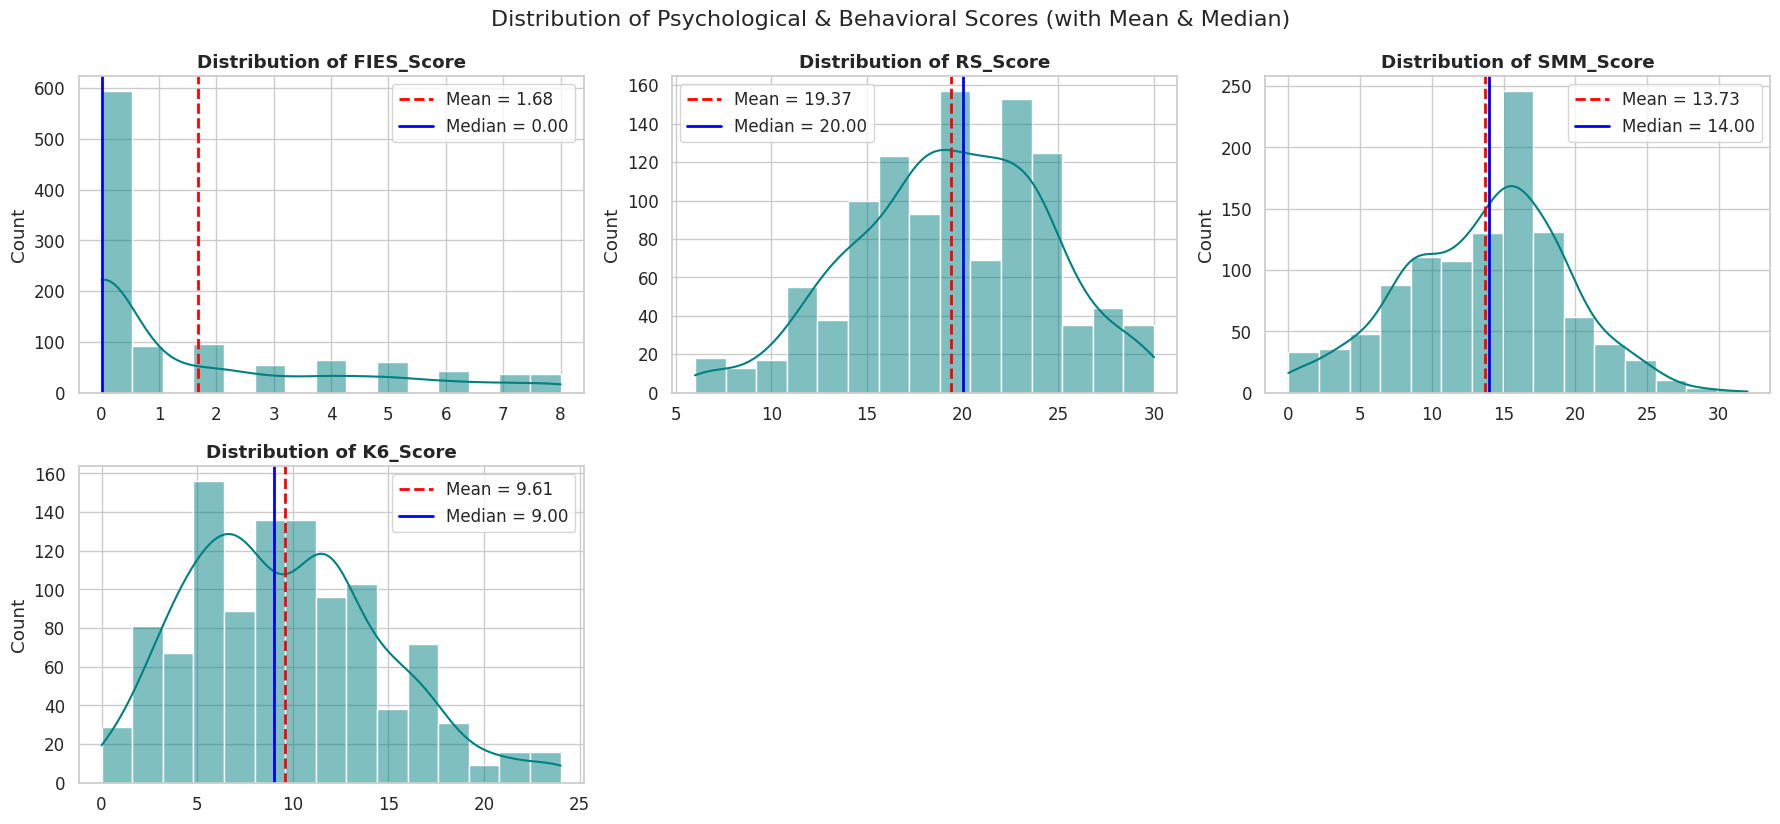

In [ ]:
score_cols = [
    'FIES_Score', 'RS_Score', 'SMM_Score', 'K6_Score',
]

print("\nPlotting Score Distributions...")

n_cols = 3
n_rows = (len(score_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(score_cols):

    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='teal', bins=15)

    mean_val = df[col].mean()
    median_val = df[col].median()

    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_val:.2f}")

    axes[i].axvline(median_val, color='blue', linestyle='-', linewidth=2, label=f"Median = {median_val:.2f}")

    axes[i].set_title(f'Distribution of {col}', fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Distribution of Psychological & Behavioral Scores (with Mean & Median)",
             y=1.03, fontsize=16)
plt.show()


## 1. **FIES_Score – Food Insecurity**
- The distribution is **highly right-skewed**, with the vast majority scoring **0**.
- **Mean = 1.68** vs **Median = 0** indicates a substantial gap caused by a small high-risk subgroup.
- **Interpretation:**  
  Most students experience **no food insecurity**, but a minority shows extremely elevated risk levels.  
  This variable is ideal for **risk segmentation**, **clustering**, or **causal inference**.

---

## 2. **RS_Score – Psychological Resilience**
- The distribution appears **nearly normal** and centered around ~20.
- Mean and median are almost identical.
- **Interpretation:**  
  Resilience is relatively **stable and homogeneous** across the sample, making this score suitable for use as a **predictor** in regression or SEM models.

---

## 3. **SMM_Score – Stress Mindset**
- Shows slight **left skew**, with more participants scoring higher values.
- Mean and median are close.
- **Interpretation:**  
  Students generally exhibit a **positive stress mindset**, seeing pressure as enhancing rather than debilitating.  
  This variable may serve as a **bridge factor** in network analysis.

---

## 4. **K6_Score – Psychological Distress**
- Approximately normal with a **right tail** representing students with high distress.
- **Mean ≈ 9.6**, **Median = 9**.
- **Interpretation:**  
  Overall distress levels are moderate, but there is a meaningful subgroup experiencing **clinically relevant distress**.  
  Useful for **risk profiling** and **mental-health modeling**.

---

## 5. **IM Score – Intrinsic Motivation**
- Clearly **bell-shaped** around 50.
- Mean and median are nearly identical.
- **Interpretation:**  
  Students report **strong and consistent intrinsic motivation**, aligning with Self-Determination Theory.  
  IM is well suited to act as a **moderator** in mediation models.

---

## 6. **EM Score – Extrinsic Motivation**
- Distribution leans toward **higher values** (right-skewed).
- **Interpretation:**  
  Many students appear driven by **external pressures**, such as grades or expectations.  
  EM may relate to academic stress or unhealthy performance-driven behaviors.

---

## 7. **AM Score – Amotivation**
- Strongly **right-skewed**, with most students scoring low.
- **Interpretation:**  
  A small subset demonstrates meaningful amotivation, indicating potential **academic disengagement**.  
  This makes AM a valuable **risk marker** for cluster discovery.

---

## 8. **PS Score – Perceived Stress**
- Nearly **normal** and centered around 22.
- **Interpretation:**  
  Stress levels are typical for university students and evenly distributed.  
  The PS score is one of the strongest predictors in later regression analyses.

---

## 9. **HE Score – Healthy Eating**
- Roughly **normally distributed**.
- **Interpretation:**  
  Healthy eating behaviors appear consistent across the sample, allowing straightforward comparison between groups (e.g., diet followers vs. non-followers).

---

## 10. **NM Score – Neutral Eating**
- Displays a normal shape.
- **Interpretation:**  
  Reflects general eating habits that are neither strongly healthy nor unhealthy, providing a balanced behavioral measure.

---

## 11. **UE Score – Unhealthy Eating**
- Exhibits a **multimodal distribution**, suggesting the presence of **distinct eating behavior subgroups**:
  - Low unhealthy-eating group  
  - Moderate habitual group  
  - High junk-food group
- **Interpretation:**  
  This variable is particularly suited for **clustering** and discovering **behavioral phenotypes**.


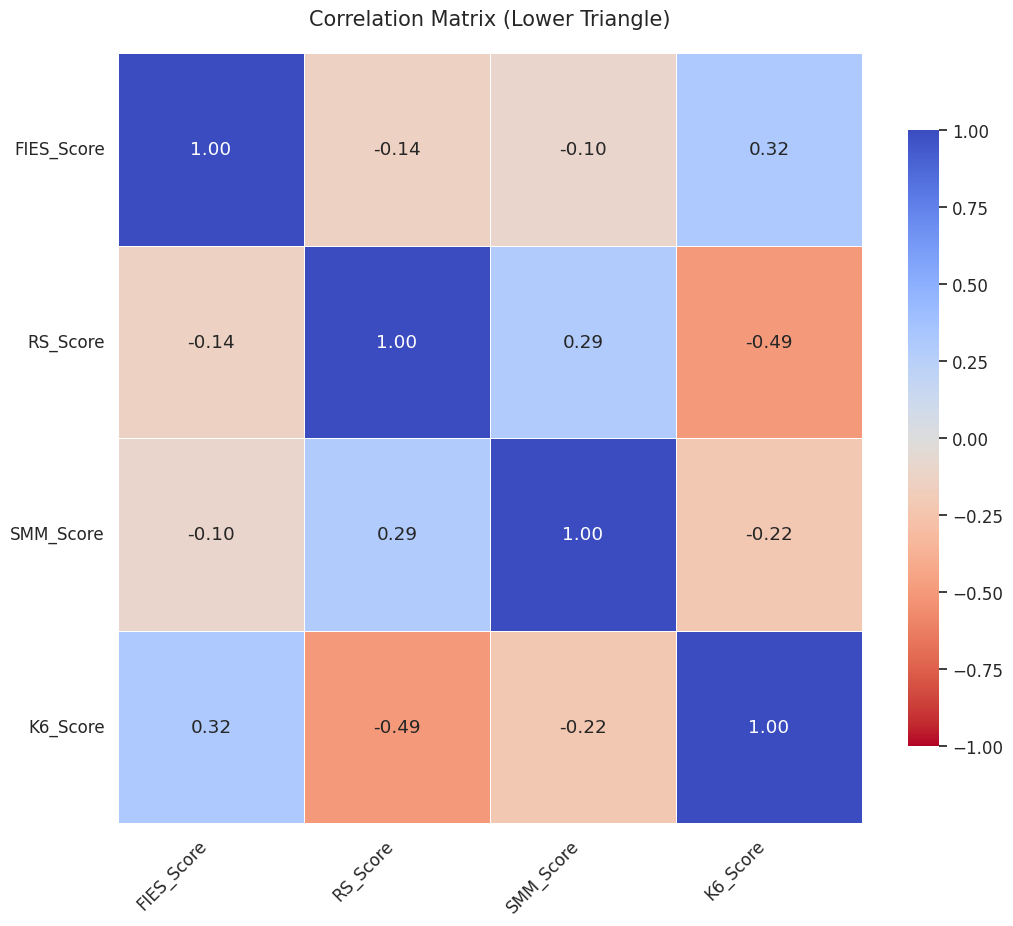

In [ ]:
corr = df[score_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm_r',
            linewidths=0.5, cbar_kws={"shrink": .8}, vmin=-1, vmax=1)

plt.title("Correlation Matrix (Lower Triangle)", fontsize=15, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

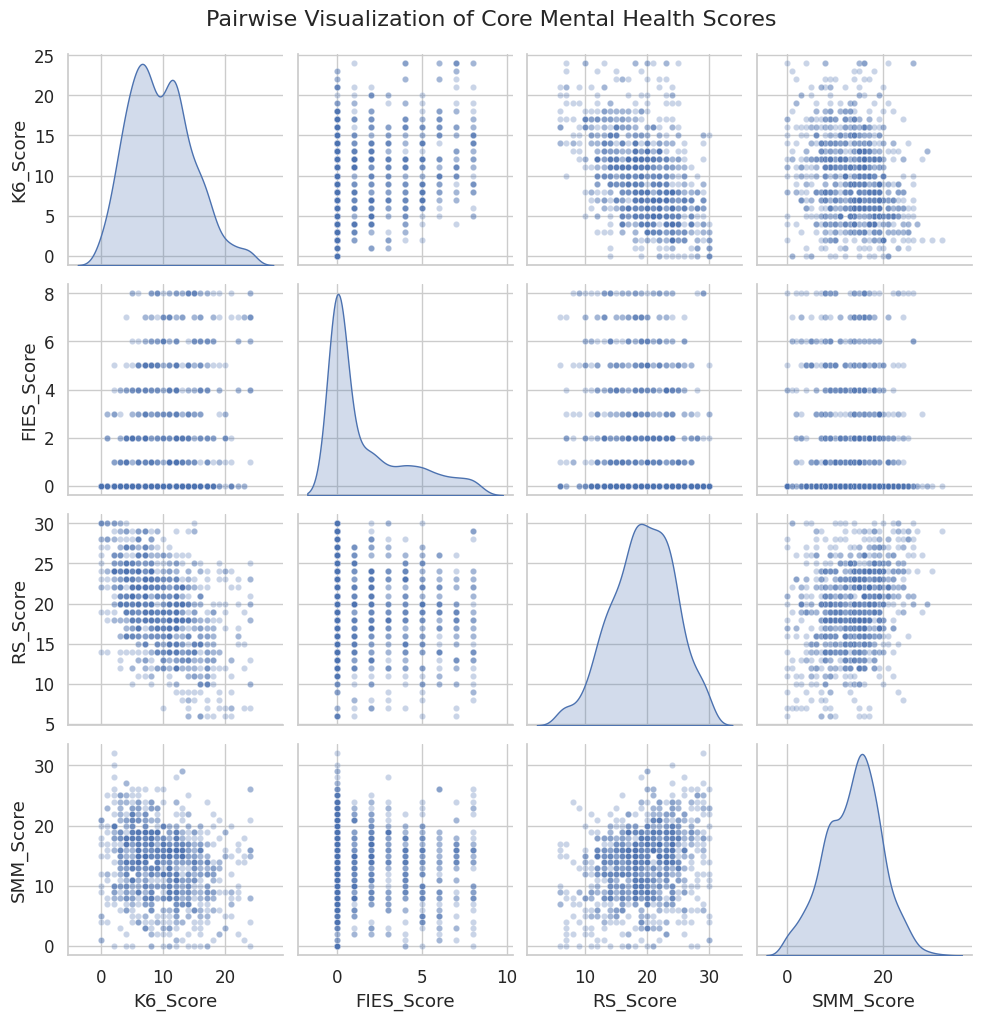

In [ ]:
sns.set_style("whitegrid")

pair_cols = ['K6_Score','FIES_Score','RS_Score','SMM_Score']

g = sns.pairplot(
    df[pair_cols],
    diag_kind="kde",
    kind="scatter",
    plot_kws={'alpha':0.3, 's':20},
)

g.fig.suptitle("Pairwise Visualization of Core Mental Health Scores", y=1.02, fontsize=16)

plt.show()


In [ ]:


snap_col = 'Are you or your family eligible for SNAP benefits or any governmental assistance program?'
score_cols = ['FIES_Score', 'K6_Score', 'RS_Score']

df_melted = df.melt(id_vars=[snap_col],
                    value_vars=score_cols,
                    var_name='Metric',
                    value_name='Score')

fig = px.box(df_melted,
             x=snap_col,
             y='Score',
             color=snap_col,
             facet_col='Metric',
             notched=True,
             title="Comparative Analysis: Impact of SNAP on Psychological and Food Metrics",
             color_discrete_map={"Yes": "#27ae60", "No": "#e74c3c", "Not sure": "#95a5a6"},
             category_orders={snap_col: ["Yes", "No", "Not sure"]})

fig.update_layout(
    width=1100,
    height=500,
    showlegend=True,
    title_x=0.5,
    legend_title_text="SNAP Eligibility"
)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()

# Effect of Household Income on Food Insecurity (FIES Score)

## **1. Interactive Boxplot Analysis**
The interactive boxplot visualization highlights the distribution of **FIES Score** across various household income brackets.

### **Key Observations**
- Lower-income groups (e.g., *Less than \$10,000*, *\$10,000–19,999*, *\$20,000–29,999*) exhibit:
  - Higher median FIES scores  
  - Wider score variability  
  - More extreme upper values (greater food insecurity)
- Higher-income groups (>\$100,000) show:
  - Very low median FIES (often near zero)
  - Much narrower distributions
  - Few to no outliers

**Interpretation:**  
Food insecurity declines substantially as household income increases, demonstrating a clear socioeconomic gradient.

---

## **2. Mean Trend Analysis (Line Plot)**
The interactive mean plot shows the average FIES Score for each income category.

### **Insights**
- The highest mean FIES value occurs at **\$20,000–29,999**.
- After this bracket, the mean FIES score decreases steadily.
- Income levels above \$100,000 show extremely low average food insecurity (< 1).

**Conclusion:**  
The relationship resembles an **inverse, non-linear trend** where increases in income dramatically reduce food insecurity risk.

---

## **3. ANOVA Test**
A one-way ANOVA was conducted to determine whether the mean FIES scores differ across income categories.

### **Results**
- **F-statistic:** 16.345  
- **p-value:** *2.88 × 10⁻³²*  

### **Interpretation**
- The probability of observing these differences by chance is virtually zero.
- **There are statistically significant differences in FIES scores across income levels.**

---



## **Overall Conclusion**
Household income is a **strong and statistically significant predictor** of food insecurity.  
The findings consistently show:

- Higher income → **Lower FIES Score**  
- Strong differences confirmed by ANOVA and Tukey  
- Non-linear relationship with clear socioeconomic cut-off points  

This suggests that improving economic conditions—even moderately—could substantially reduce food insecurity.

In [ ]:
scores = [
    'FIES_Score','K6_Score','RS_Score','SMM_Score',
]

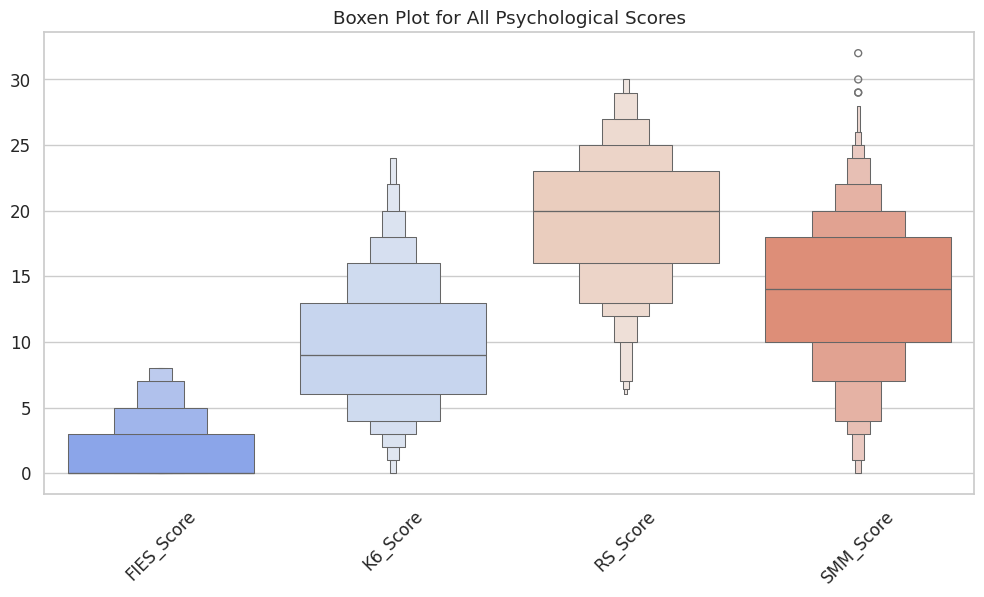

In [ ]:
plt.figure(figsize=(12,6))
sns.boxenplot(data=df[scores], palette="coolwarm")
plt.title("Boxen Plot for All Psychological Scores")
plt.xticks(rotation=45)
plt.show()

In [ ]:

table = df.groupby(
    ["Which of these describes your personal income last year?", "FIES_Class"]
).size().reset_index(name='count')

fig = px.treemap(
    table,
    path=[
        "Which of these describes your personal income last year?",
        "FIES_Class"
    ],
    values="count",
    color="count",
    color_continuous_scale="Viridis"
)

fig.update_layout(title="Treemap (Interactive Alternative to Mosaic Plot)")
fig.show()

In [ ]:


table = df.groupby(
    ["What is the total income of your primary household?", "FIES_Class"]
).size().reset_index(name='count')

fig = px.treemap(
    table,
    path=[
        "What is the total income of your primary household?",
        "FIES_Class"
    ],
    values="count",
    color="count",
    color_continuous_scale="Viridis"
)

fig.update_layout(title="Treemap (Interactive Alternative to Mosaic Plot)")
fig.show()

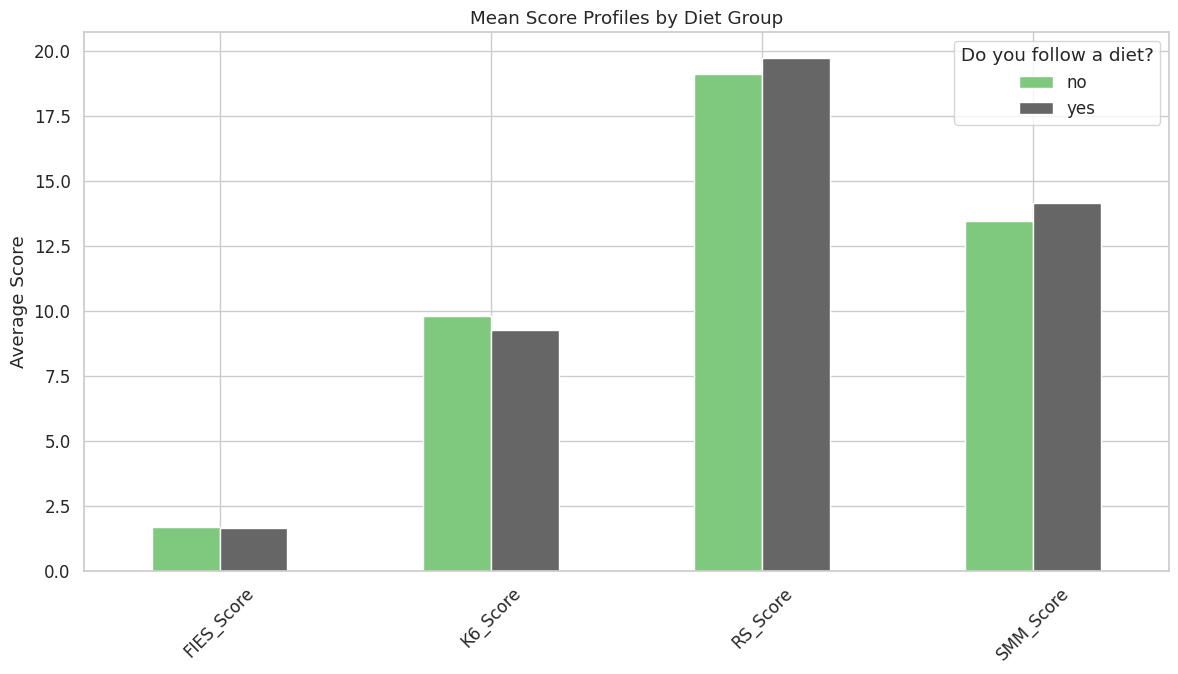

In [ ]:
group_mean = df.groupby("Do you follow a diet?")[scores].mean().T

group_mean.plot(kind="bar", figsize=(14,7), colormap="Accent")
plt.title("Mean Score Profiles by Diet Group")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

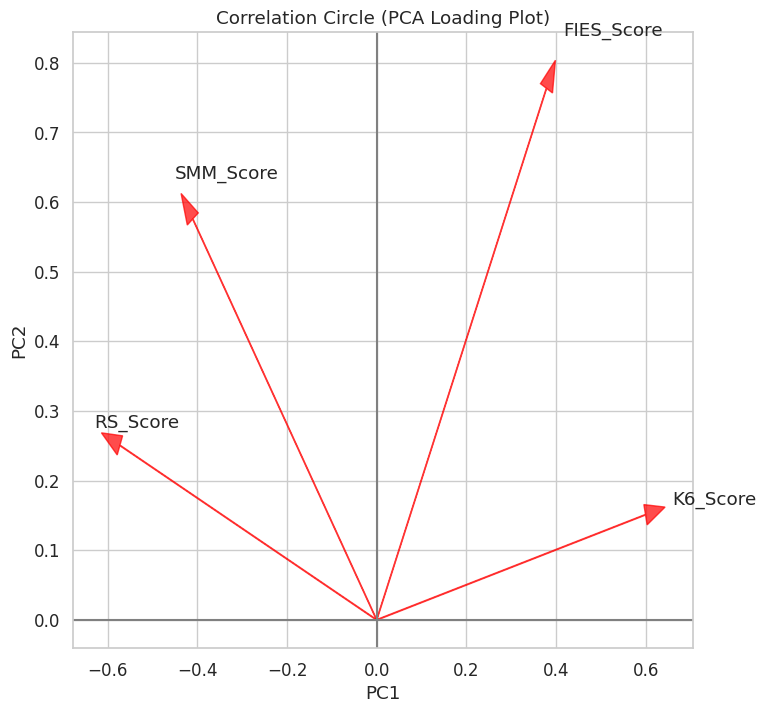

In [ ]:


X = StandardScaler().fit_transform(df[scores])
pca = PCA(n_components=2).fit(X)

components = pca.components_
cols = scores

plt.figure(figsize=(8,8))
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

for i, col in enumerate(cols):
    plt.arrow(0, 0, components[0, i], components[1, i],
              color='red', alpha=0.7, head_width=0.03)
    plt.text(components[0, i]*1.1, components[1, i]*1.1, col)

plt.title("Correlation Circle (PCA Loading Plot)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [ ]:

core_scores = [
    'K6_Score',
    'RS_Score',
    'SMM_Score',
]

group_means = df.groupby("Are you currently enrolled in college?")[core_scores].mean()

categories = core_scores
fig = go.Figure()

for group in group_means.index:
    fig.add_trace(go.Scatterpolar(
        r = group_means.loc[group].values,
        theta = categories,
        fill='toself',
        name=group
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    title="Psychological Profiles: Diet Followers vs Non-followers"
)
fig.show()

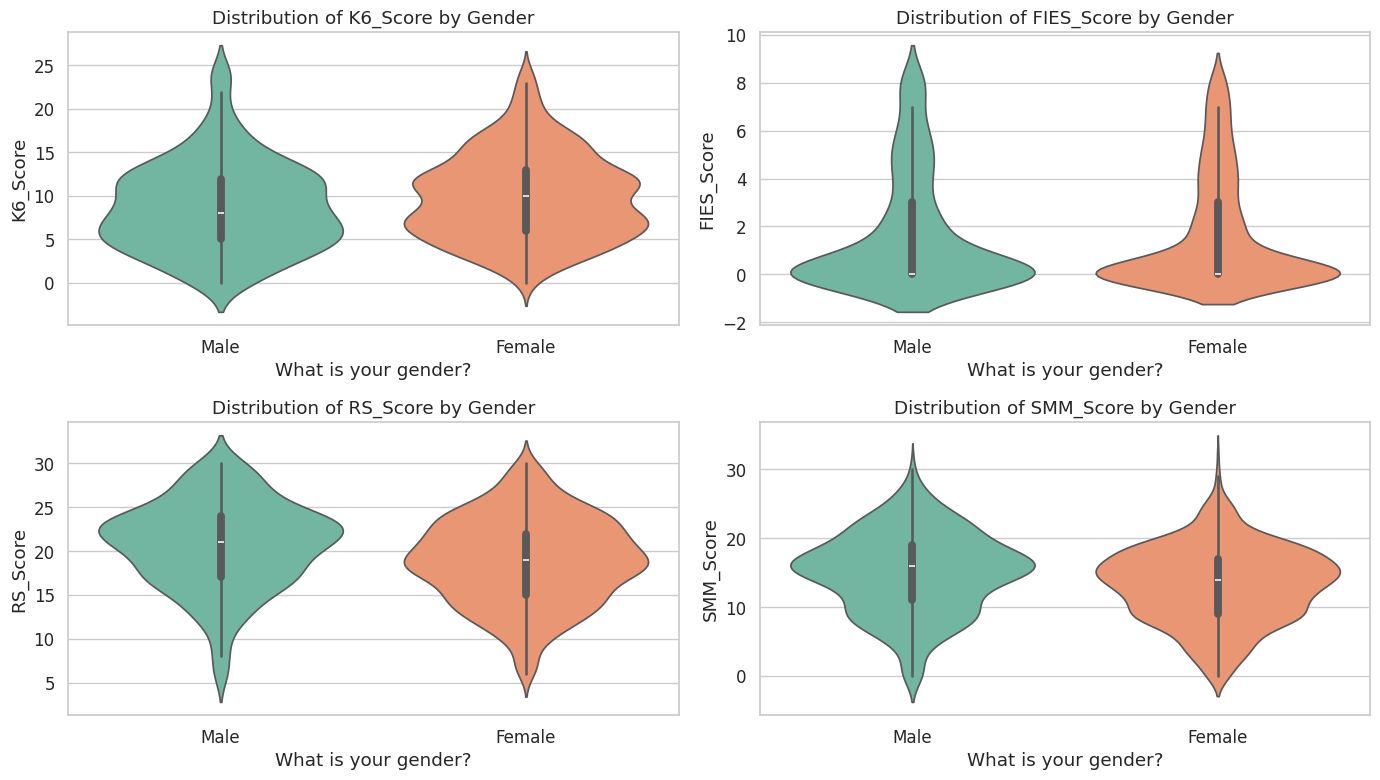

In [ ]:
plt.figure(figsize=(14, 8))

for i, col in enumerate(['K6_Score','FIES_Score','RS_Score','SMM_Score'], 1):
    plt.subplot(2, 2, i)
    sns.violinplot(
        data=df,
        x="What is your gender?",
        y=col,
        palette="Set2"
    )
    plt.title(f"Distribution of {col} by Gender")

plt.tight_layout()
plt.show()

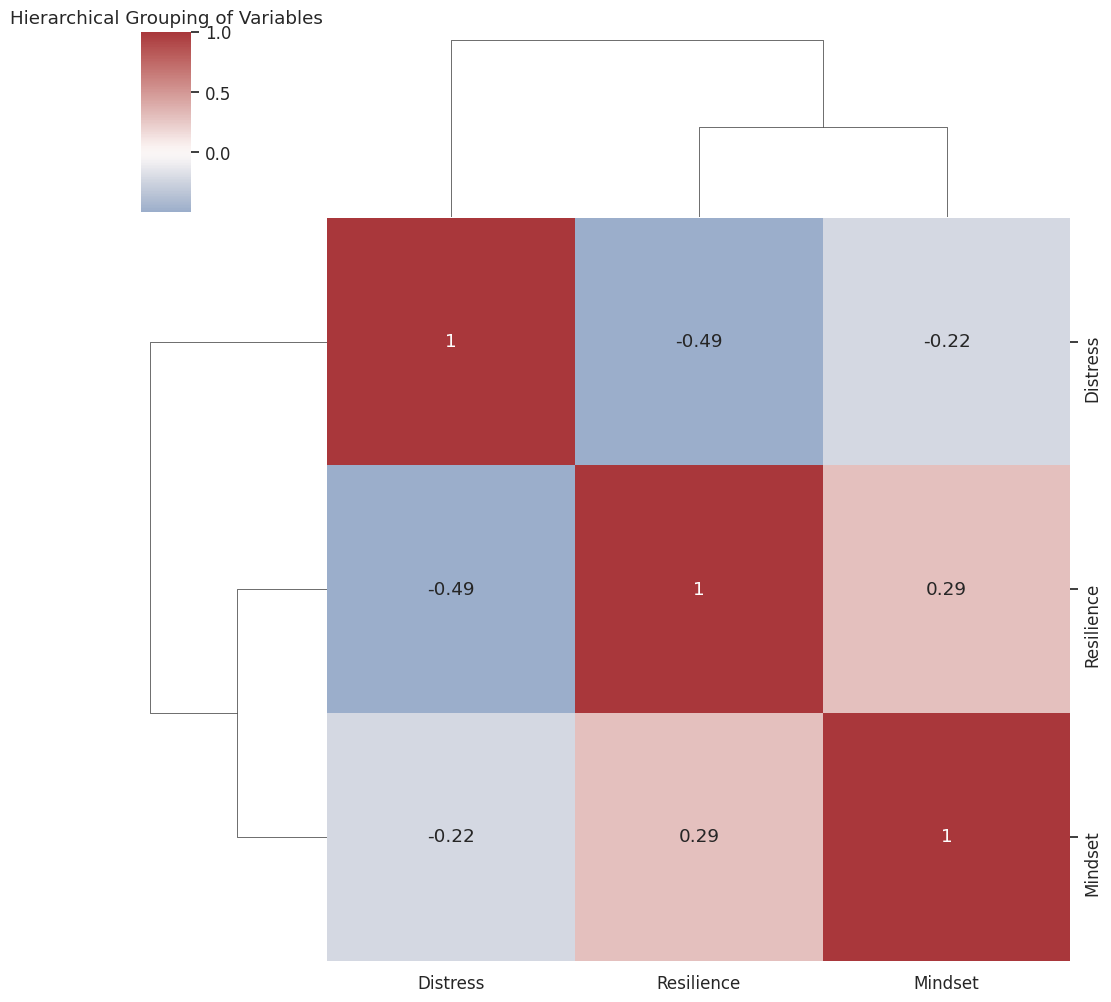

In [ ]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_z = pd.DataFrame(scaler.fit_transform(df[['RS_Score', 'SMM_Score', 'K6_Score']]),
                    columns=['Resilience', 'Mindset', 'Distress'])



sns.clustermap(df_z.corr(), annot=True, cmap='vlag', center=0)
plt.title('Hierarchical Grouping of Variables')
plt.show()

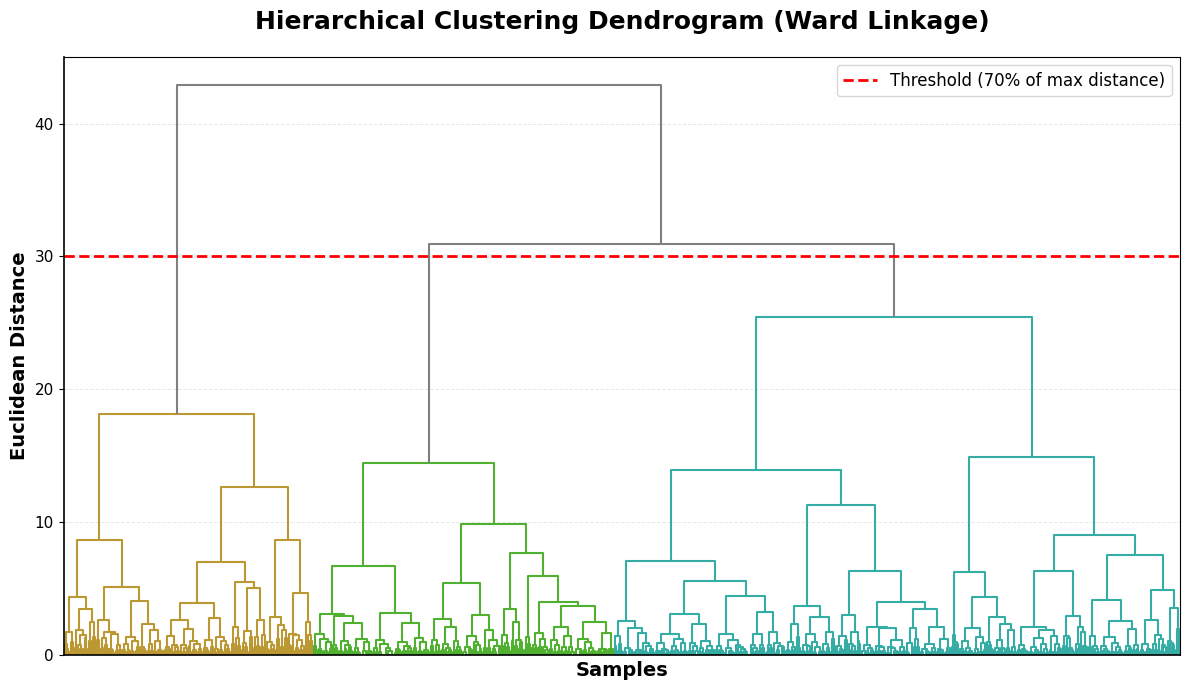

In [ ]:
plt.style.use('default')
sns.set_palette("husl")
features = ['K6_Score', 'RS_Score', 'SMM_Score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

linked = linkage(X_scaled, method='ward')

fig, ax = plt.subplots(figsize=(12, 7), facecolor='white')
ax.set_facecolor('white')

dendrogram(
    linked,
    ax=ax,
    orientation='top',
    distance_sort='ascending',
    show_leaf_counts=False,
    no_labels=True,
    above_threshold_color='gray',
    color_threshold=0.7 * max(linked[:, 2]),
)

ax.set_title('Hierarchical Clustering Dendrogram (Ward Linkage)',
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Samples', fontsize=14, fontweight='bold')
ax.set_ylabel('Euclidean Distance', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xticks([])

threshold = 0.7 * max(linked[:, 2])
ax.axhline(y=threshold, color='red', linestyle='--', linewidth=2,
           label=f'Threshold (70% of max distance)')

ax.grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=0.7)
ax.legend(fontsize=12)

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

plt.tight_layout()
plt.show()

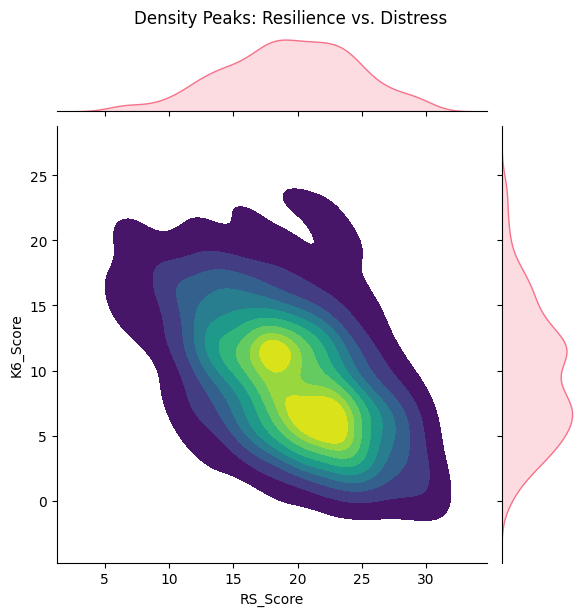

In [ ]:
sns.jointplot(data=df, x="RS_Score", y="K6_Score", kind="kde", fill=True, cmap='viridis')
plt.suptitle('Density Peaks: Resilience vs. Distress', y=1.02)
plt.show()

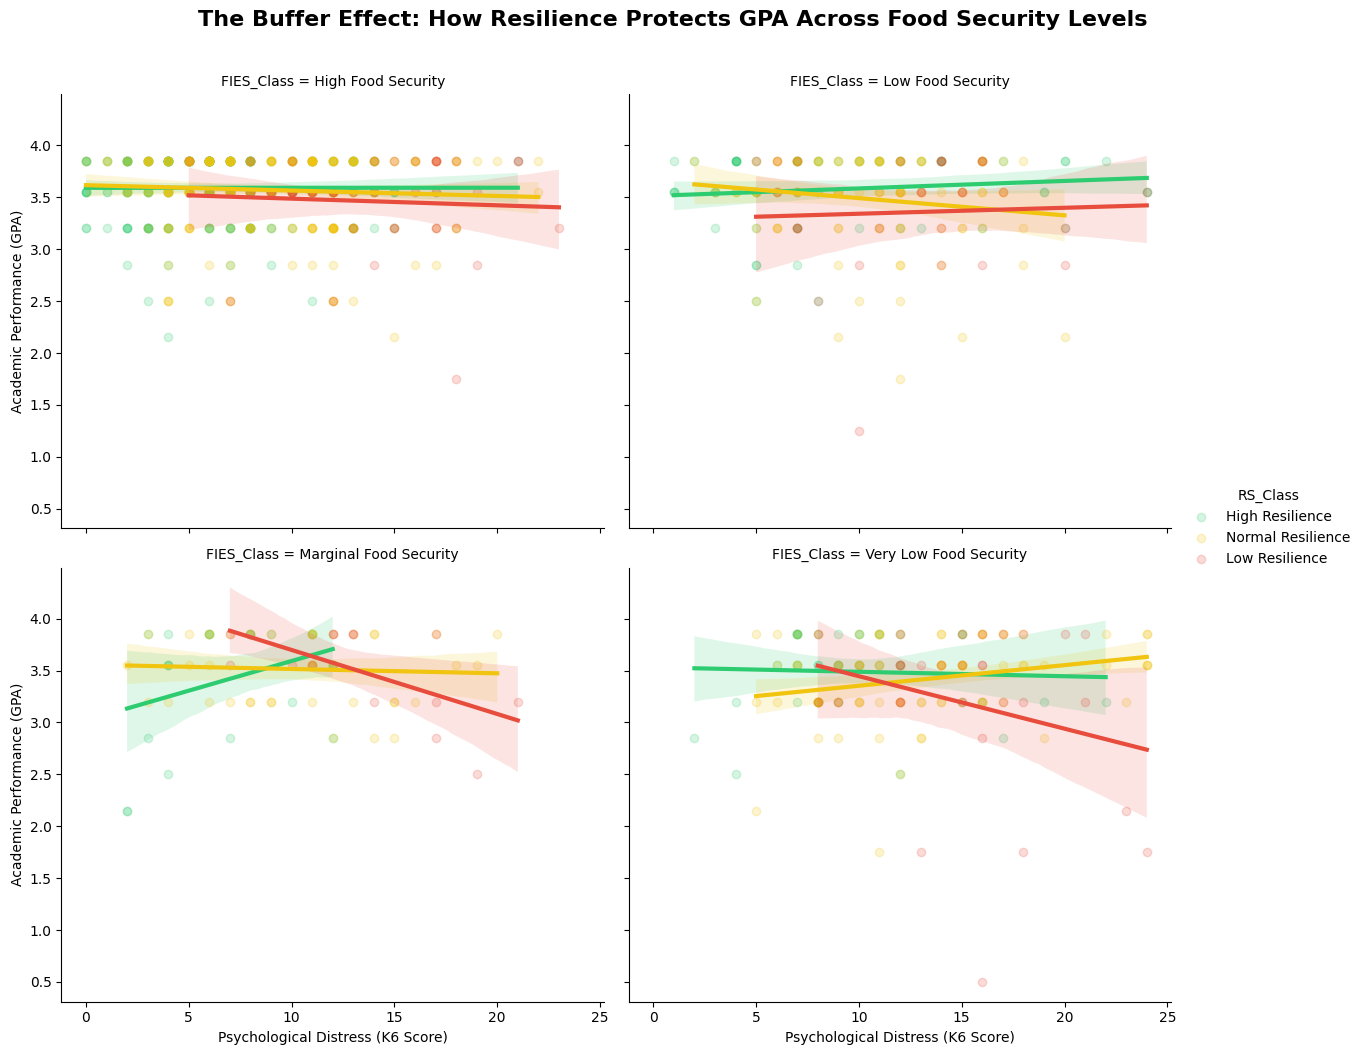

In [ ]:
if 'GPA_Numeric' not in df.columns:
    gpa_map = {
        '3.7-4.0': 3.85, '3.4-3.69': 3.55, '3.0-3.39': 3.20,
        '2.7-2.99': 2.85, '2.3-2.69': 2.50, '2.0-2.29': 2.15,
        '1.5-1.99': 1.75, '1.0-1.49': 1.25, 'Less than 1': 0.5
    }
    gpa_col = 'What is your cumulative GPA range?'
    df['GPA_Numeric'] = df[gpa_col].astype(str).str.strip().map(gpa_map)

plot_df = df.dropna(subset=['GPA_Numeric', 'K6_Score', 'RS_Class', 'FIES_Class'])


g = sns.lmplot(
    data=plot_df,
    x="K6_Score",
    y="GPA_Numeric",
    hue="RS_Class",
    col="FIES_Class",
    palette={"Low Resilience": "#e74c3c", "Normal Resilience": "#f1c40f", "High Resilience": "#2ecc71"},
    scatter_kws={'alpha':0.2},
    line_kws={'linewidth':3},
    col_wrap=2,
    height=5,
    aspect=1.2
)

g.set_axis_labels("Psychological Distress (K6 Score)", "Academic Performance (GPA)")
g.fig.suptitle("The Buffer Effect: How Resilience Protects GPA Across Food Security Levels",
               y=1.05, fontsize=16, fontweight='bold')

plt.show()

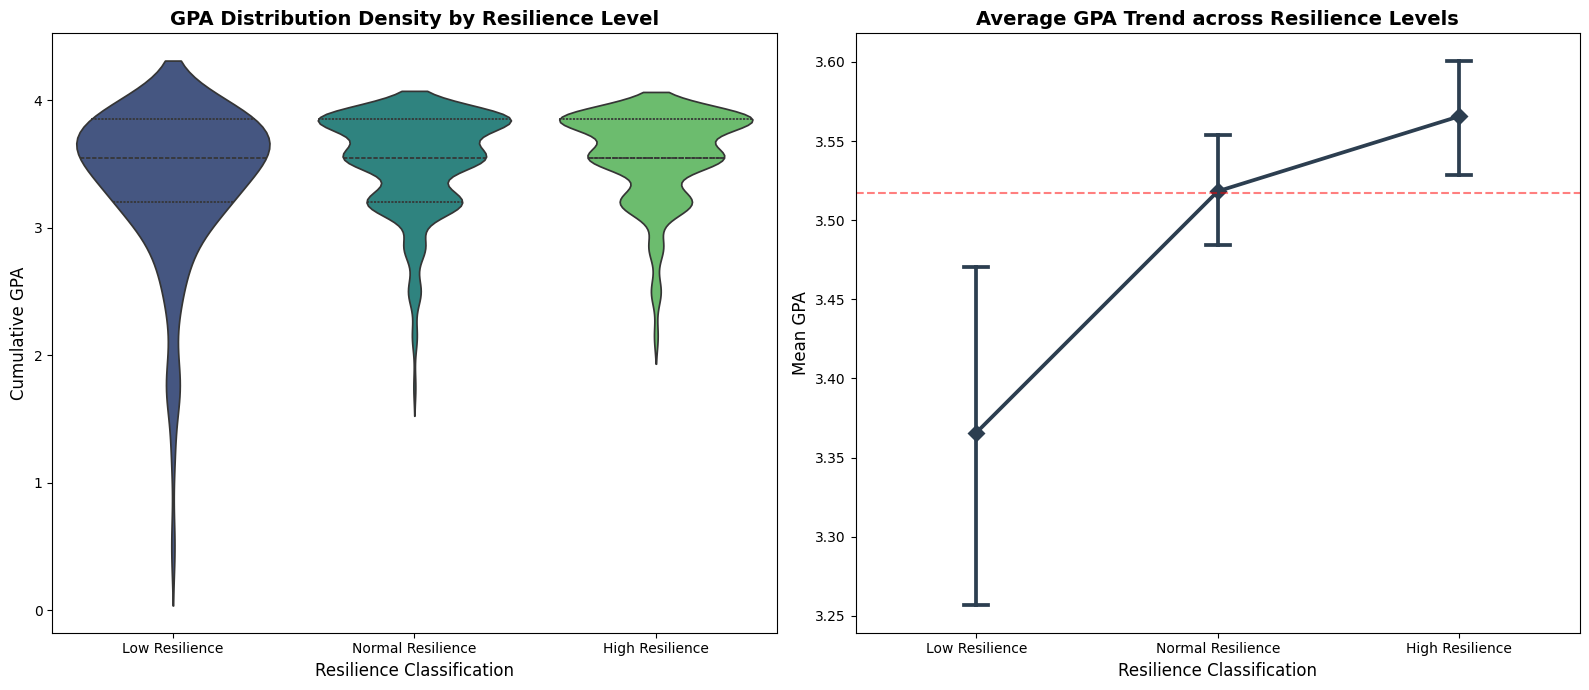

In [ ]:

plt.rcParams['font.family'] = 'sans-serif'

res_order = ['Low Resilience', 'Normal Resilience', 'High Resilience']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

sns.violinplot(
    data=df,
    x='RS_Class',
    y='GPA_Numeric',
    order=res_order,
    palette='viridis',
    inner="quart",
    ax=ax1
)
ax1.set_title('GPA Distribution Density by Resilience Level', fontsize=14, fontweight='bold')
ax1.set_xlabel('Resilience Classification', fontsize=12)
ax1.set_ylabel('Cumulative GPA', fontsize=12)

sns.pointplot(
    data=df,
    x='RS_Class',
    y='GPA_Numeric',
    order=res_order,
    color='#2c3e50',
    capsize=.1,
    markers="D",
    linestyles="-",
    ax=ax2
)
ax2.axhline(df['GPA_Numeric'].mean(), color='red', linestyle='--', alpha=0.5, label='Overall Average')

ax2.set_title('Average GPA Trend across Resilience Levels', fontsize=14, fontweight='bold')
ax2.set_xlabel('Resilience Classification', fontsize=12)
ax2.set_ylabel('Mean GPA', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
income_order = [
    "Less than $10,000",
    "$10,000 to $19,999",
    "$20,000 to $29,999",
    "$30,000 to $39,999",
    "$40,000 to $49,999",
    "$50,000 to $59,999",
    "$60,000 to $69,999",
    "$70,000 to $79,999",
    "$80,000 to $89,999",
    "$90,000 to $99,999",
    "$100,000 to $149,999",
    "$150,000 to $249,999",
    "$250,000 or more"
]

df["Income_Ordered"] = pd.Categorical(
    df["What is the total income of your primary household?"],
    categories=income_order,
    ordered=True
)

In [ ]:


groups = [
    df[df["Income_Ordered"] == inc]["FIES_Score"].dropna()
    for inc in income_order
]

anova_stat, anova_p = f_oneway(*groups)

print("ANOVA F-statistic:", anova_stat)
print("p-value:", anova_p)

ANOVA F-statistic: 16.345414548475233
p-value: 2.886087422493812e-32


In [ ]:
fig = px.box(
    df,
    x="Income_Ordered",
    y="FIES_Score",
    color="Income_Ordered",
    category_orders={"Income_Ordered": income_order},
    title="Impact of Household Income on Food Insecurity (FIES)",
    width=1200,
    height=600
)

fig.update_layout(
    xaxis_title="Household Income Levels (Lower to Higher)",
    yaxis_title="Food Insecurity Score (FIES)",
    showlegend=False,
    xaxis_tickangle=-45,
    title_x=0.5,
    plot_bgcolor='white'
)

fig.update_traces(
    jitter=0.3,
    marker=dict(opacity=0.4, size=4)
)

fig.show()

In [ ]:
income_means = df.groupby("Income_Ordered")["FIES_Score"].mean().reset_index()

fig2 = px.line(
    income_means,
    x="Income_Ordered",
    y="FIES_Score",
    markers=True,
    title="Mean FIES Score by Income Level (Interactive Line Plot)"
)

fig2.update_layout(
    xaxis_tickangle=-45,
    width=1200,
    height=500
)

fig2.show()


In [ ]:
from scipy import stats

groups = [df[df["What is your age?"] == age]["K6_Score"]
          for age in df["What is your age?"].unique()]

f_stat, p_val = stats.f_oneway(*groups)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_val)

ANOVA F-statistic: 12.879293632443535
p-value: 3.033688697102677e-10


 Explanatory Analysis: Psychological Distress (K6 Score) Across Age Groups

To examine whether psychological distress levels differ across age groups, we analyzed the distribution of the K6 Score using violin plots, boxplots, and a one-way ANOVA test.

### **1. Visual Patterns**
Both the violin and boxplot visualizations reveal clear structural differences between age groups:

- **Ages 23–29** show the **highest distress levels**, with a wider spread and higher median values.  
- **Ages 50+** exhibit the **lowest distress levels**, with a compact distribution and low central tendency.  
- **Ages 18–22** show moderate distress but include several high-value outliers.  
- **Ages 30–39** fall between the extremes with stable but slightly elevated scores.

These patterns suggest meaningful psychological variation linked to age-related life stages.

### **2. Statistical Test (ANOVA)**

The one-way ANOVA confirmed the visual findings:

- **F-statistic:** 12.88  
- **p-value:** 3.03 × 10⁻¹⁰ (p < 0.001)  

This indicates **statistically significant differences** in mean K6 scores across age groups, meaning the variation observed in the plots is unlikely due to random noise.

### **3. Interpretation**

The results suggest that psychological distress is **not evenly distributed** across age categories:

- **Individuals aged 23–29** appear to experience the **highest psychological strain**, potentially due to transitional life stressors such as career establishment, financial instability, and identity development.  
- **Older adults (50+)** report the **lowest distress**, which may reflect increased emotional regulation, life stability, and reduced external pressure.

### **4. Conclusion**

> Psychological distress (K6 Score) varies significantly across age groups, with younger adults—especially those aged 23–29—showing elevated levels of distress. These findings highlight the importance of considering age as a key external factor influencing mental health outcomes within the dataset.


# Explanatory

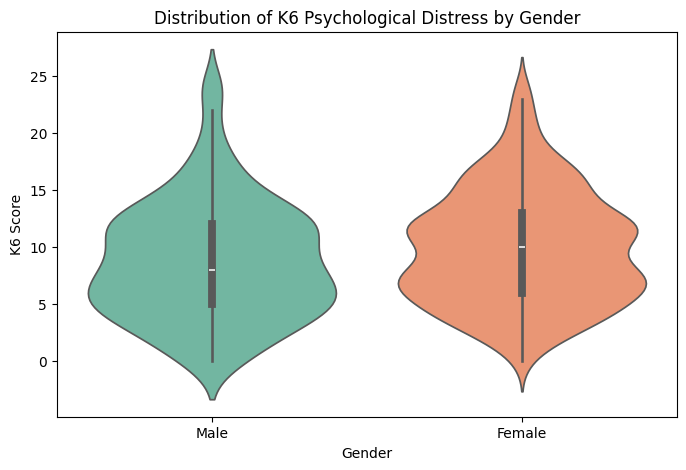

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="What is your gender?", y="K6_Score", inner="box", palette="Set2")
plt.title("Distribution of K6 Psychological Distress by Gender")
plt.xlabel("Gender")
plt.ylabel("K6 Score")
plt.show()

In [ ]:
from scipy import stats

male = df[df["What is your gender?"] == "Male"]["K6_Score"]
female = df[df["What is your gender?"] == "Female"]["K6_Score"]

t_stat, p_val = stats.ttest_ind(male, female, equal_var=False)

mean_diff = male.mean() - female.mean()
pooled_sd = np.sqrt((male.std()**2 + female.std()**2) / 2)
cohens_d = mean_diff / pooled_sd

print("Welch t-test:")
print("t-statistic:", t_stat)
print("p-value:", p_val)
print("\nCohen's d (effect size):", cohens_d)
print("\nMale mean:", male.mean())
print("Female mean:", female.mean())


Welch t-test:
t-statistic: -3.304261852834527
p-value: 0.0010204346823152804

Cohen's d (effect size): -0.22882650633445215

Male mean: 8.758620689655173
Female mean: 9.922292993630574


Gender Differences in Psychological Distress (K6 Score)

A Welch’s t-test was conducted to examine whether psychological distress (K6 Score) differs between male and female students.

**Results:**

- **t-statistic:** -3.304  
- **p-value:** 0.001  
- **Cohen’s d:** -0.229  
- **Male Mean:** 8.76  
- **Female Mean:** 9.92  

**Interpretation:**

The test indicates a statistically significant difference in psychological distress between genders (*p* < 0.01). Female students exhibit higher levels of distress compared to male students. Although the effect size is small (Cohen’s d ≈ 0.23), the difference is consistent and meaningful, likely due to the large sample size.

These findings align with prior psychological research showing higher reported distress levels among female university populations.


In [ ]:

age_order = ["18-22", "23-29", "30-39", "40-49", "50+"]

fig = px.box(
    df,
    x="What is your age?",
    y="K6_Score",
    color="What is your age?",
    title="K6 Score Distribution by Age Group",
    category_orders={"What is your age?": age_order}
)

fig.update_layout(
    width=900,
    height=500,
    showlegend=False,
    xaxis_title="Age Group",
    yaxis_title="K6 Psychological Distress Score",
    title_x=0.5
)

fig.update_traces(
    jitter=0.3,
    marker=dict(opacity=0.6, size=6),
    line=dict(width=2)
)

fig.show()
### ordering


_____________________________ END of Explanatory_______________________________

# RQ1

In [ ]:
features = ['K6_Score', 'RS_Score', 'SMM_Score']
X = df[features]
X_describe = X.describe().T
X_describe['Skew'] = X.skew()
X_describe['Kurtosis'] = X.kurtosis()
X_describe

,count,mean,std,min,25%,50%,75%,max,Skew,Kurtosis
K6_Score,1075.0,9.608372,5.069547,0.0,6.0,9.0,13.0,24.0,0.463714,-0.169062
RS_Score,1075.0,19.373023,5.031874,6.0,16.0,20.0,23.0,30.0,-0.219273,-0.300558
SMM_Score,1075.0,13.725581,5.674443,0.0,10.0,14.0,18.0,32.0,-0.130541,-0.196317


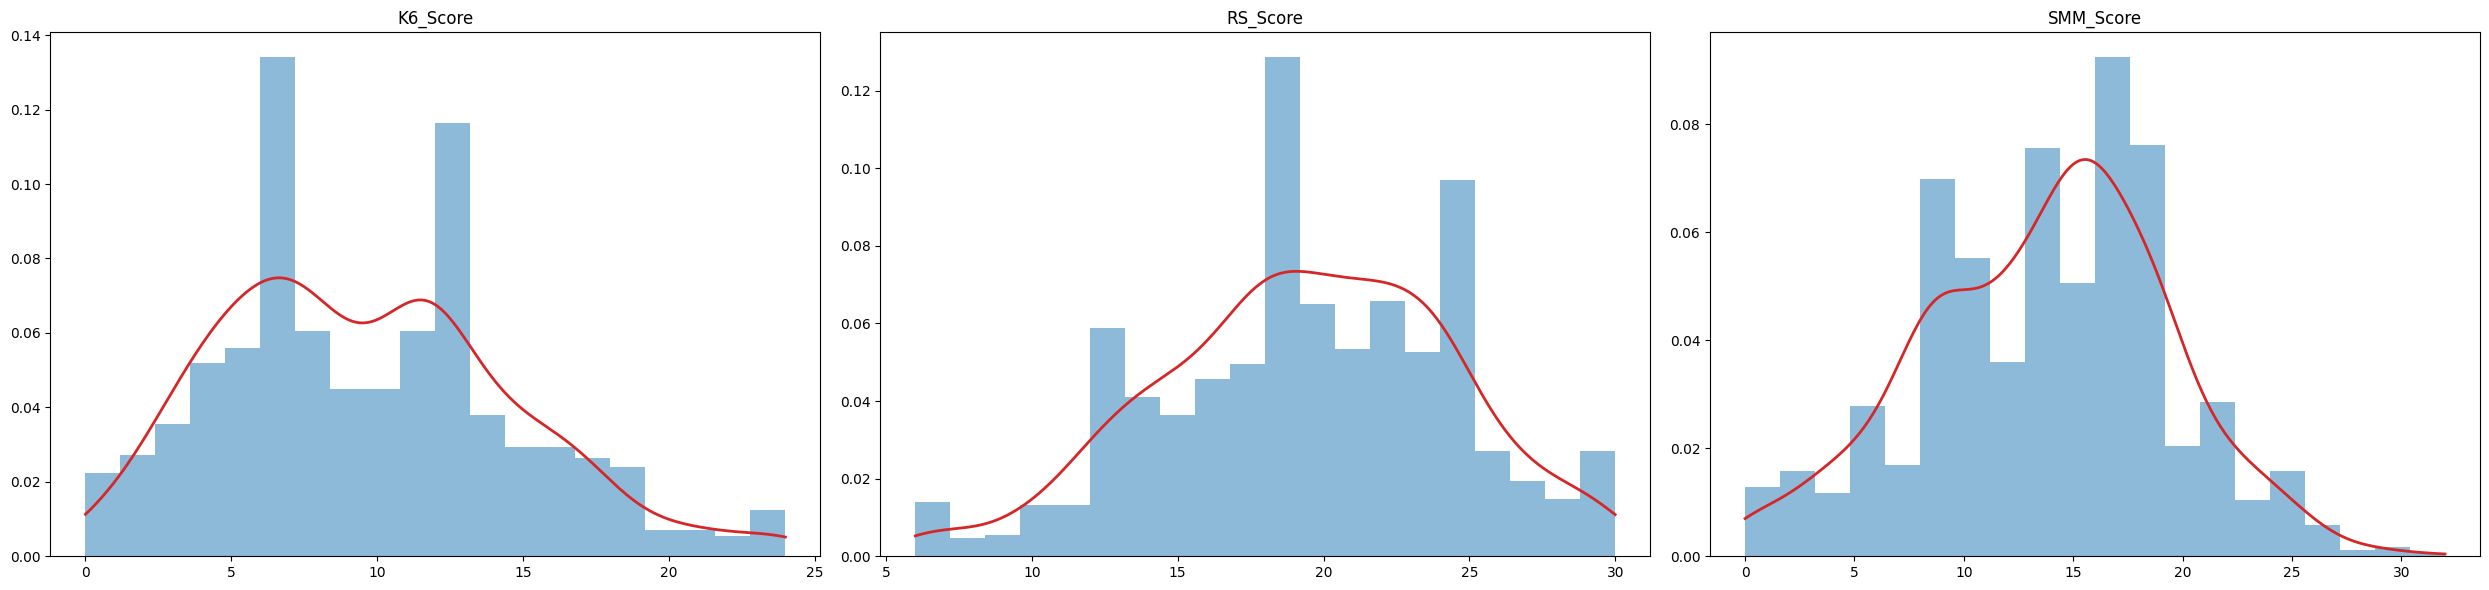

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
axes = axes.flatten()

hist_color = "#1f77b4"
line_color = "#d62728"

for i, feature in enumerate(features):
    data = df[feature].dropna()

    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 300)

    axes[i].hist(
        data,
        bins=20,
        density=True,
        alpha=0.5,
        color=hist_color
    )
    axes[i].plot(
        x_vals,
        kde(x_vals),
        linewidth=2,
        color=line_color
    )

    axes[i].set_title(feature)

plt.tight_layout()
plt.show()


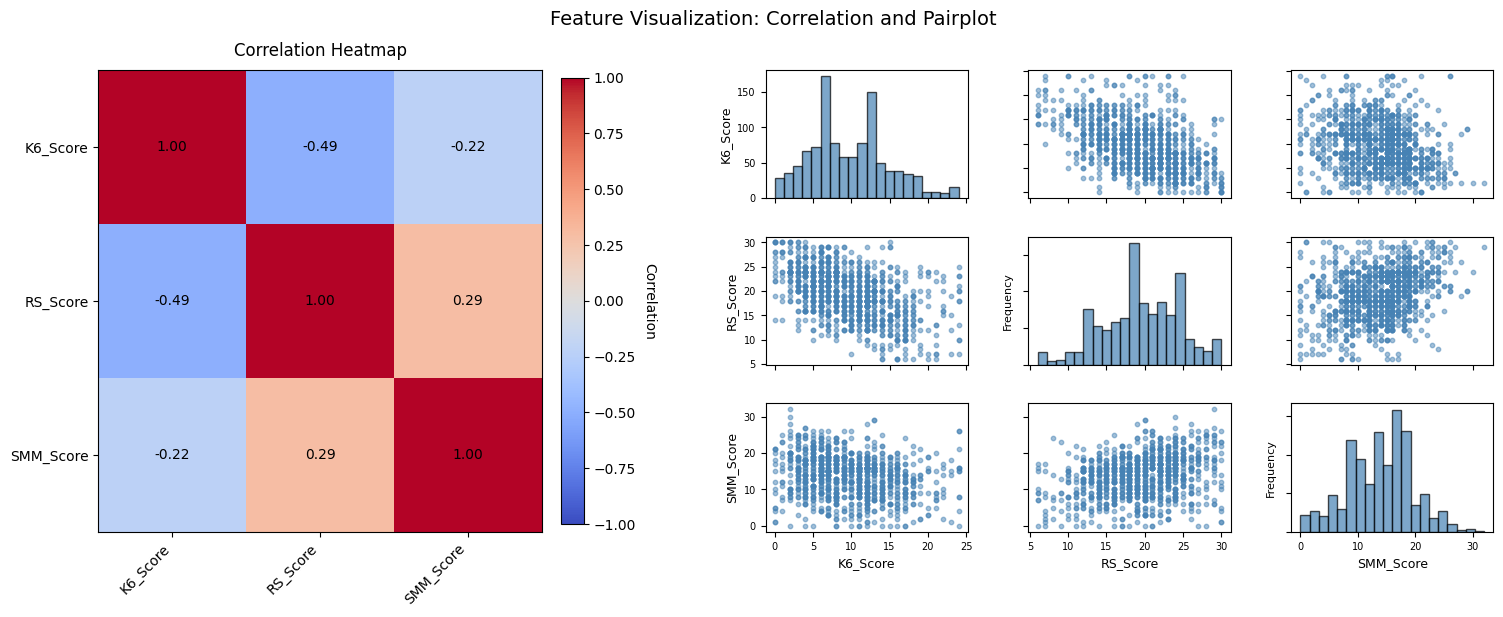

In [ ]:
fig = plt.figure(figsize=(18, 6))

gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.5], wspace=0.3)

ax_heatmap = fig.add_subplot(gs[0])
corr_matrix = df[features].corr(method='pearson')
im = ax_heatmap.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
ax_heatmap.set_xticks(np.arange(len(features)))
ax_heatmap.set_yticks(np.arange(len(features)))
ax_heatmap.set_xticklabels(features, rotation=45, ha='right')
ax_heatmap.set_yticklabels(features)
for i in range(len(features)):
    for j in range(len(features)):
        text = ax_heatmap.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                              ha='center', va='center', color='black', fontsize=10)
ax_heatmap.set_title('Correlation Heatmap', fontsize=12, pad=10)
cbar = plt.colorbar(im, ax=ax_heatmap, fraction=0.046, pad=0.04)
cbar.set_label('Correlation', rotation=270, labelpad=15)

n_features = len(features)
gs_right = gs[1].subgridspec(n_features, n_features, hspace=0.3, wspace=0.3)

for i in range(n_features):
    for j in range(n_features):
        ax = fig.add_subplot(gs_right[i, j])
        if i == j:
            ax.hist(df[features[i]].dropna(), bins=20, color='steelblue', alpha=0.7, edgecolor='black')
            ax.set_ylabel('Frequency', fontsize=8)
        else:
            ax.scatter(df[features[j]], df[features[i]], alpha=0.5, s=10, color='steelblue')
        if i == n_features - 1:
            ax.set_xlabel(features[j], fontsize=9)
        else:
            ax.set_xticklabels([])
        if j == 0:
            ax.set_ylabel(features[i], fontsize=9)
        else:
            ax.set_yticklabels([])
        ax.tick_params(labelsize=7)

plt.suptitle('Feature Visualization: Correlation and Pairplot', fontsize=14, y=0.98)

plt.tight_layout()
plt.show()

In [ ]:
agg = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward',
    metric='euclidean'
)

df['Agg_Cluster'] = agg.fit_predict(X_scaled)
df['Agg_Cluster'] = df['Agg_Cluster'].replace({1:'High-Risk Vulnerable', 0:'Typical Human', 2:'Resilient Thriving'})

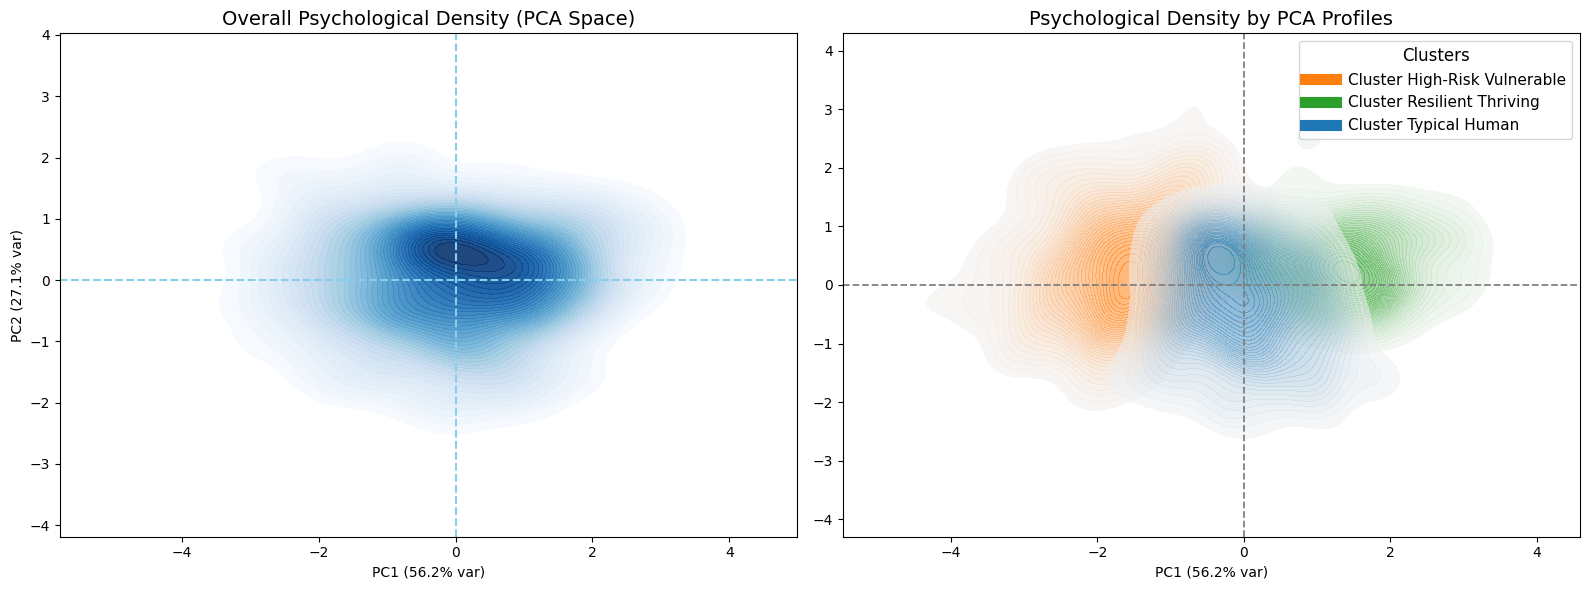

In [ ]:
cluster_col = 'Agg_Cluster'

pca = PCA(n_components=2)
PCs = pca.fit_transform(X_scaled)

df["PC1"] = PCs[:, 0]
df["PC2"] = PCs[:, 1]

plt.style.use("default")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

cluster_colors = {
    'High-Risk Vulnerable': "#ff7f0e",
    'Typical Human': "#1f77b4",
    'Resilient Thriving': "#2ca02c"
}

sns.kdeplot(
    x=df["PC1"],
    y=df["PC2"],
    fill=True,
    cmap="Blues",
    levels=40,
    bw_adjust=1.1,
    alpha=0.9,
    ax=axes[0]
)

axes[0].axhline(0, color="skyblue", linestyle="--", linewidth=1.5)
axes[0].axvline(0, color="skyblue", linestyle="--", linewidth=1.5)

axes[0].set_title("Overall Psychological Density (PCA Space)", fontsize=14)
axes[0].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
axes[0].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")


handles = []

for c in sorted(df[cluster_col].unique()):
    sns.kdeplot(
        x=df[df[cluster_col] == c]["PC1"],
        y=df[df[cluster_col] == c]["PC2"],
        fill=True,
        alpha=0.55,
        cmap=sns.light_palette(cluster_colors[c], as_cmap=True),
        levels=35,
        bw_adjust=1.1,
        ax=axes[1]
    )

    handles.append(
        plt.Line2D([0], [0], color=cluster_colors[c], lw=8, label=f"Cluster {c}")
    )

axes[1].axhline(0, color="gray", linestyle="--", linewidth=1.3)
axes[1].axvline(0, color="gray", linestyle="--", linewidth=1.3)

axes[1].set_title("Psychological Density by PCA Profiles", fontsize=14)
axes[1].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
axes[1].set_ylabel("")

axes[1].legend(handles=handles, title="Clusters", fontsize=11, title_fontsize=12)


plt.tight_layout()
plt.show()

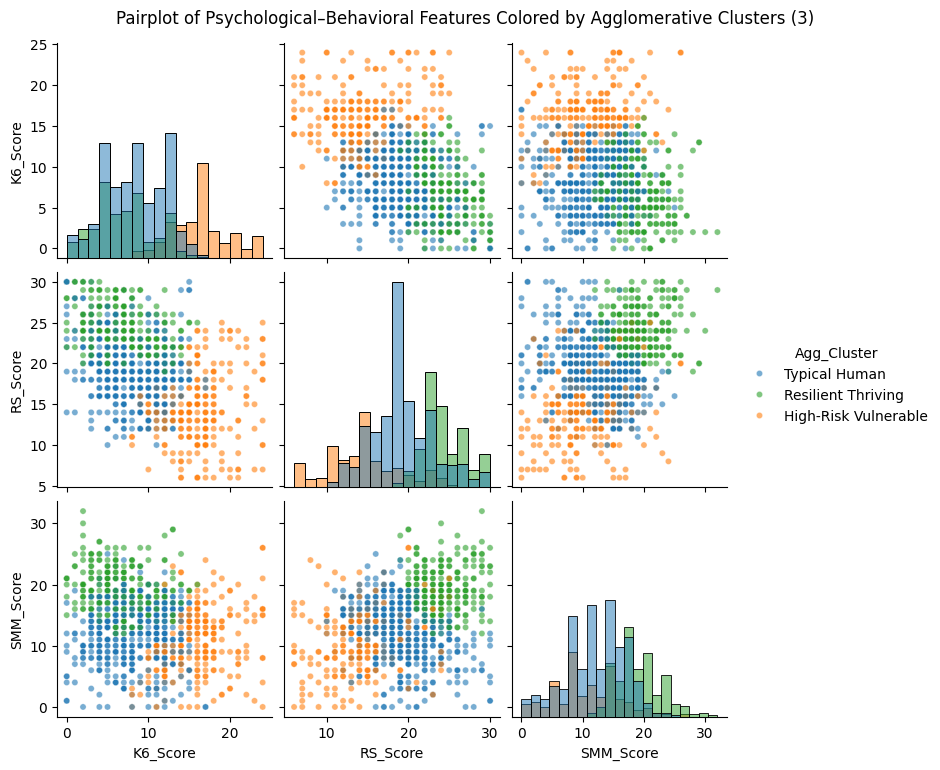

In [ ]:
sns.pairplot(
    df,
    vars=features,
    hue="Agg_Cluster",
    palette=cluster_colors,
    diag_kind="hist",
    plot_kws={"s": 20, "alpha": 0.6}
)

plt.suptitle("Pairplot of Psychological–Behavioral Features Colored by Agglomerative Clusters (3)", y=1.02)
plt.show()

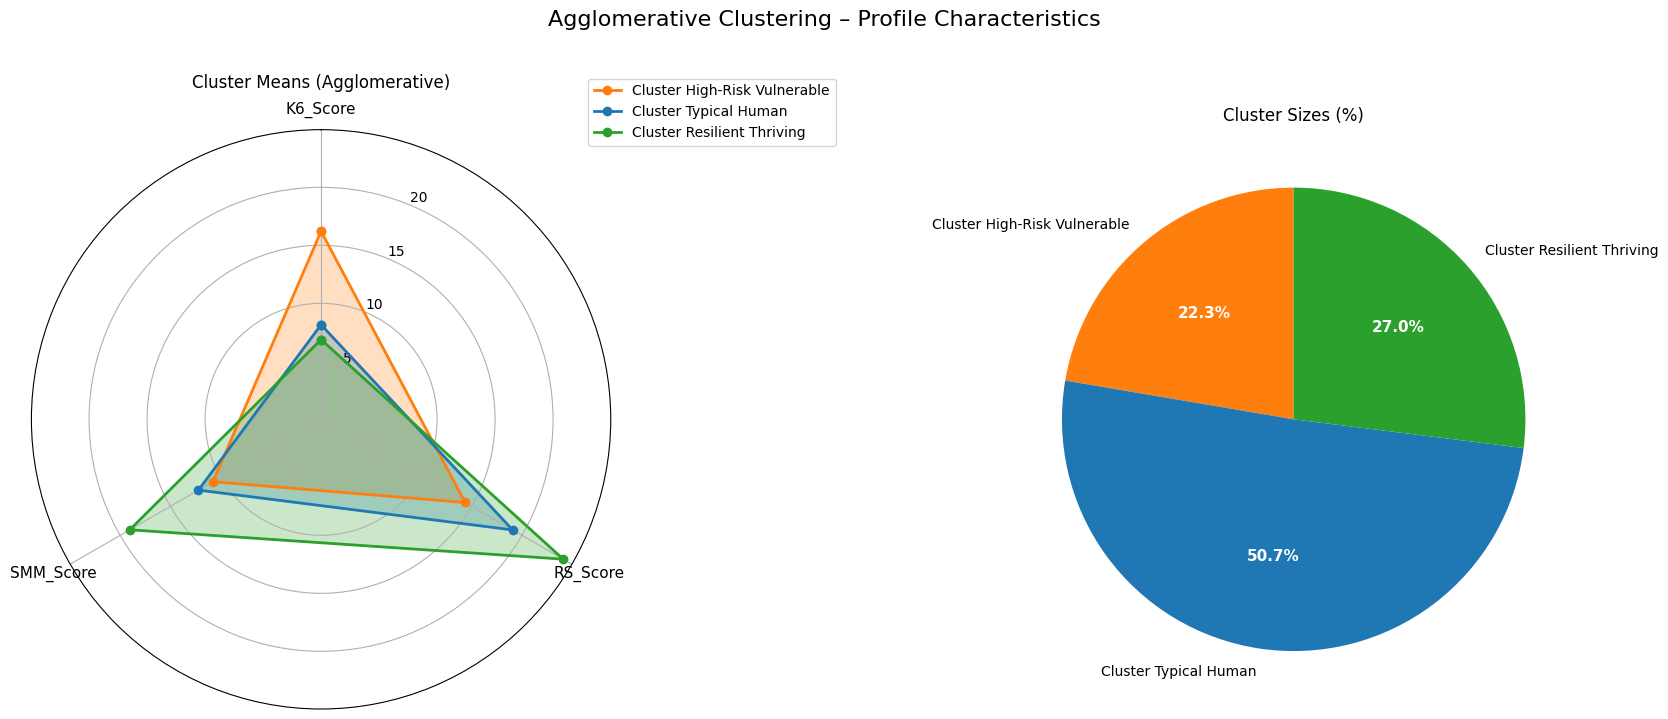

In [ ]:
profile_means = df.groupby('Agg_Cluster')[features].mean()
profile_sizes = (df['Agg_Cluster'].value_counts(normalize=True) * 100).sort_index()

profiles_ordered = ['High-Risk Vulnerable', 'Typical Human', 'Resilient Thriving']
means = profile_means.loc[profiles_ordered].values
sizes = profile_sizes.loc[profiles_ordered].values
profiles = profiles_ordered
bar_colors = [cluster_colors[p] for p in profiles]

fig = plt.figure(figsize=(18, 7))
ax1 = fig.add_subplot(121, projection='polar')
ax2 = fig.add_subplot(122)

num_vars = len(features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

for idx, profile in enumerate(profiles):
    values = means[idx].tolist()
    values += values[:1]

    ax1.plot(
        angles,
        values,
        'o-',
        linewidth=2,
        label=f'Cluster {profile}',
        color=cluster_colors[profile]
    )
    ax1.fill(
        angles,
        values,
        alpha=0.25,
        color=cluster_colors[profile]
    )

ax1.set_theta_offset(np.pi / 2)
ax1.set_theta_direction(-1)
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(features, fontsize=11)
ax1.set_title("Cluster Means (Agglomerative)", fontsize=12, pad=30)
ax1.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1))

wedges, texts, autotexts = ax2.pie(
    sizes,
    labels=[f'Cluster {p}' for p in profiles],
    colors=bar_colors,
    autopct='%1.1f%%',
    startangle=90
)
ax2.set_title("Cluster Sizes (%)", fontsize=12)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_weight('bold')

plt.suptitle("Agglomerative Clustering – Profile Characteristics", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

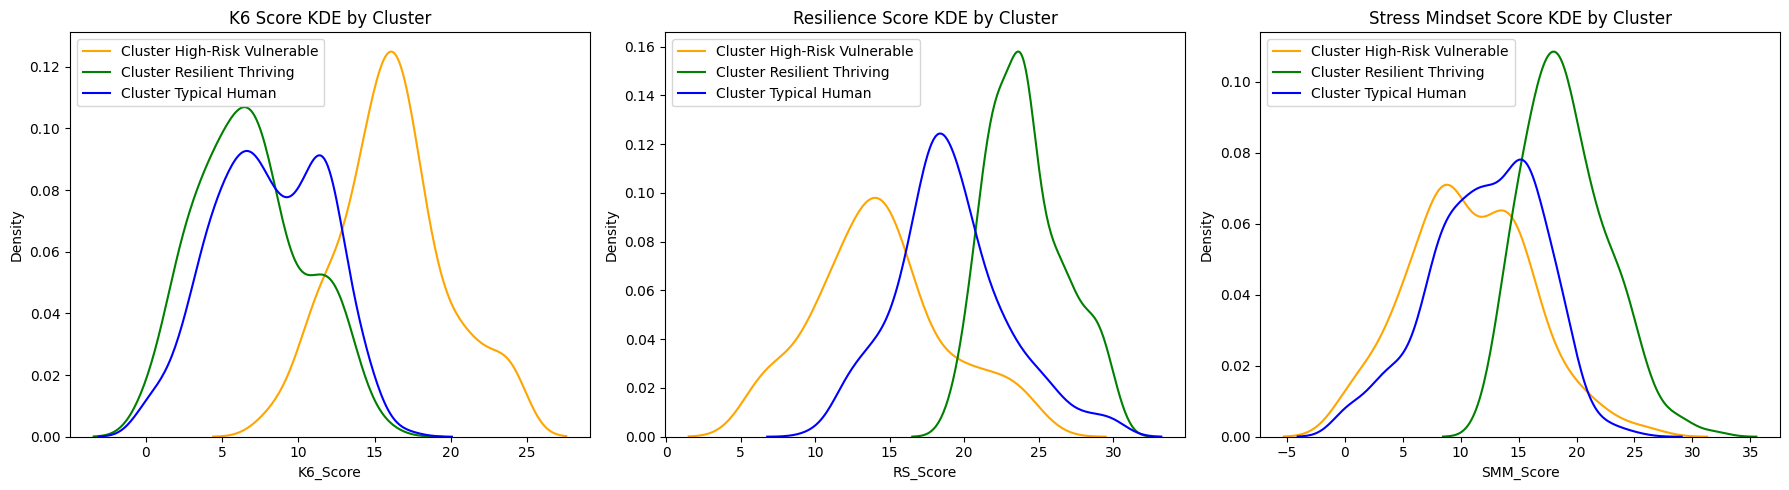

In [ ]:
cluster_col = 'Agg_Cluster'

plt.style.use('default')
sns.set_palette("husl")

cluster_labels = sorted(df[cluster_col].unique())
cluster_colors = {'High-Risk Vulnerable': 'orange', 'Typical Human': 'blue', 'Resilient Thriving': 'green', 3: 'black'}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

ax = axes[0]
for c in cluster_labels:
    sns.kdeplot(
        df[df[cluster_col] == c]['K6_Score'],
        ax=ax,
        color=cluster_colors[c],
        label=f"Cluster {c}"
    )
ax.set_title("K6 Score KDE by Cluster")
ax.set_xlabel("K6_Score")
ax.set_ylabel("Density")
ax.legend()

ax = axes[1]
for c in cluster_labels:
    sns.kdeplot(
        df[df[cluster_col] == c]['RS_Score'],
        ax=ax,
        color=cluster_colors[c],
        label=f"Cluster {c}"
    )
ax.set_title("Resilience Score KDE by Cluster")
ax.set_xlabel("RS_Score")
ax.set_ylabel("Density")
ax.legend()

ax = axes[2]
for c in cluster_labels:
    sns.kdeplot(
        df[df[cluster_col] == c]['SMM_Score'],
        ax=ax,
        color=cluster_colors[c],
        label=f"Cluster {c}"
    )
ax.set_title("Stress Mindset Score KDE by Cluster")
ax.set_xlabel("SMM_Score")
ax.set_ylabel("Density")
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
print("==============================")
print("ANOVA + TUKEY HSD RESULTS")
print("==============================\n")

for feature in features:
    print(f"--- {feature} ---")

    model = ols(f"{feature} ~ C({cluster_col})", data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    F_value = anova_table['F'].iloc[0]
    p_value = anova_table['PR(>F)'].iloc[0]

    print(f"ANOVA: F = {F_value:.3f}, p = {p_value:.5f}")

    tukey = pairwise_tukeyhsd(
        endog=df[feature],
        groups=df[cluster_col],
        alpha=0.05
    )

    tukey_df = pd.DataFrame(
        tukey._results_table.data[1:],
        columns=tukey._results_table.data[0]
    )

    tukey_df = tukey_df[['group1', 'group2', 'meandiff', 'p-adj', 'reject']]

    tukey_df['meandiff'] = tukey_df['meandiff'].astype(float).round(4)
    tukey_df['p-adj'] = tukey_df['p-adj'].astype(float).round(4)

    print("\nTukey HSD (clean table):")
    print(tukey_df)


ANOVA + TUKEY HSD RESULTS

--- K6_Score ---
ANOVA: F = 534.783, p = 0.00000

Tukey HSD (clean table):
                 group1              group2  meandiff  p-adj  reject
0  High-Risk Vulnerable  Resilient Thriving   -9.3366    0.0    True
1  High-Risk Vulnerable       Typical Human   -8.0584    0.0    True
2    Resilient Thriving       Typical Human    1.2783    0.0    True
--- RS_Score ---
ANOVA: F = 465.800, p = 0.00000

Tukey HSD (clean table):
                 group1              group2  meandiff  p-adj  reject
0  High-Risk Vulnerable  Resilient Thriving    9.7728    0.0    True
1  High-Risk Vulnerable       Typical Human    4.7322    0.0    True
2    Resilient Thriving       Typical Human   -5.0406    0.0    True
--- SMM_Score ---
ANOVA: F = 269.975, p = 0.00000

Tukey HSD (clean table):
                 group1              group2  meandiff   p-adj  reject
0  High-Risk Vulnerable  Resilient Thriving    8.2865  0.0000    True
1  High-Risk Vulnerable       Typical Human    1.4435  

1.Mental Distress (K6_Score)

Null Hypothesis ($H_0$): There is no significant difference in the mean Mental Distress scores across the three psychological profiles.

Alternative Hypothesis ($H_1$): At least one psychological profile has a significantly different mean Mental Distress score compared to the others.

Result: Reject $H_0$ ($p = 0.0000$).

2. Psychological Resilience (RS_Score)
Null Hypothesis ($H_0$): There is no significant difference in the mean Resilience scores across the three psychological profiles.
Alternative Hypothesis ($H_1$): At least one psychological profile has a significantly different mean Resilience score compared to the others.
Result: Reject $H_0$ ($p = 0.0000$).
3. Stress Mindset (SMM_Score)
Null Hypothesis ($H_0$): There is no significant difference in the mean Stress Mindset scores across the three psychological profiles.
Alternative Hypothesis ($H_1$): At least one psychological profile has a significantly different mean Stress Mindset score compared to the others.
Result: Reject $H_0$ ($p = 0.0000$).


# RQ2

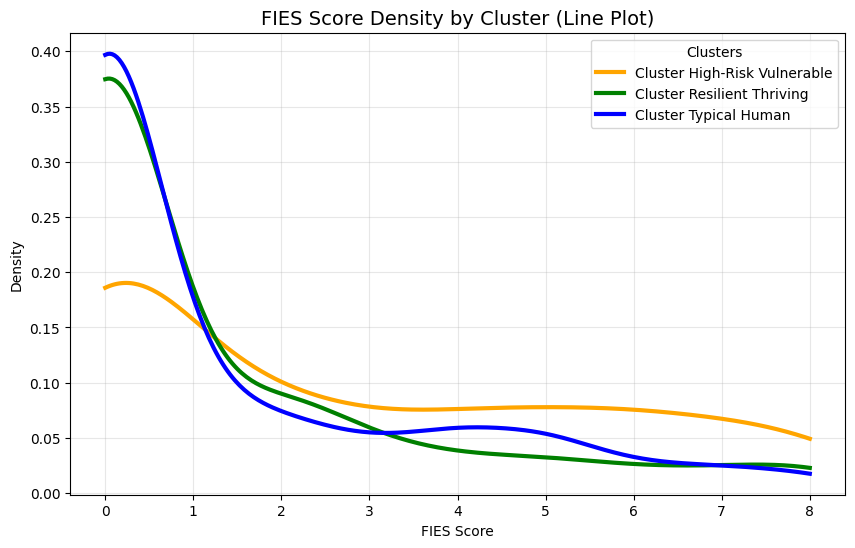

In [ ]:
feature = "FIES_Score"

plt.figure(figsize=(10,6))

cluster_colors = {'High-Risk Vulnerable': 'orange', 'Typical Human': 'blue', 'Resilient Thriving': 'green'}

for c in sorted(df[cluster_col].unique()):
    data = df[df[cluster_col] == c][feature].dropna()

    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 300)

    plt.plot(
        x_vals,
        kde(x_vals),
        label=f"Cluster {c}",
        color=cluster_colors[c],
        linewidth=3
    )

plt.title("FIES Score Density by Cluster (Line Plot)", fontsize=14)
plt.xlabel("FIES Score")
plt.ylabel("Density")
plt.grid(alpha=0.3)
plt.legend(title="Clusters")
plt.show()

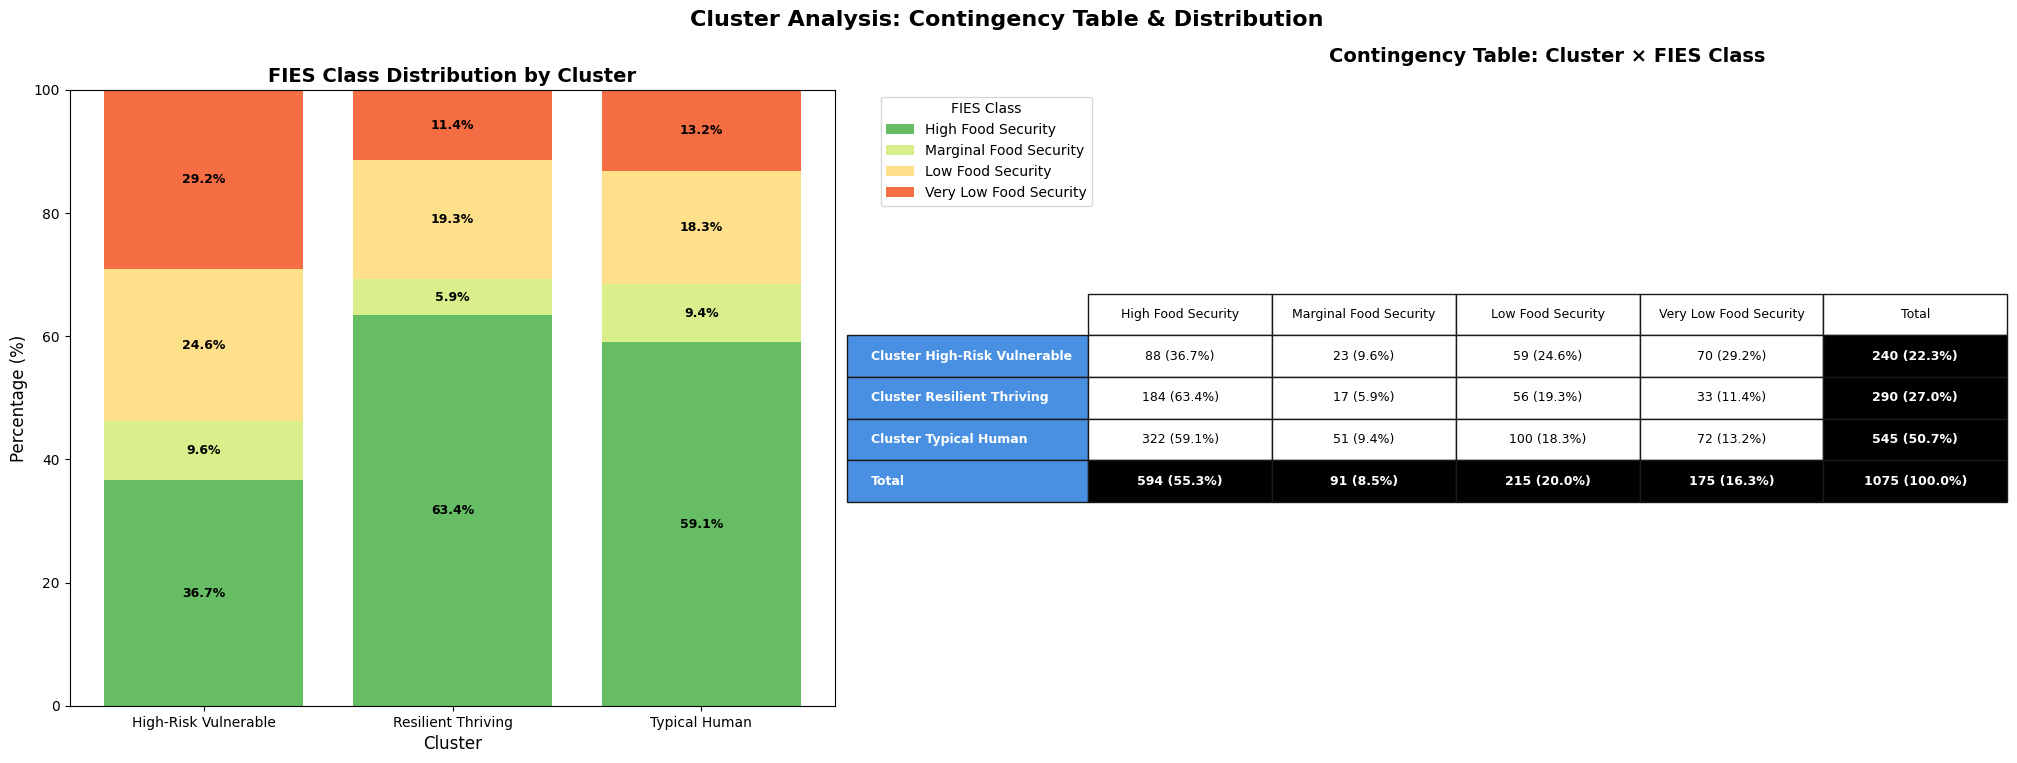

In [ ]:
fies_order = ['High Food Security', 'Marginal Food Security', 'Low Food Security', 'Very Low Food Security']

contingency = pd.crosstab(df['Agg_Cluster'], df['FIES_Class'], margins=True, margins_name='Total')
contingency = contingency.reindex(columns=[col for col in fies_order if col in contingency.columns] + ['Total'])
contingency.index = [f'Cluster {i}' if i != 'Total' else 'Total' for i in contingency.index]

prob_table = pd.DataFrame(index=contingency.index, columns=contingency.columns)

for idx in contingency.index[:-1]:
    row_total = contingency.loc[idx, 'Total']
    for col in contingency.columns[:-1]:
        freq = contingency.loc[idx, col]
        prob_table.loc[idx, col] = f"{freq} ({freq/row_total*100:.1f}%)"

for col in contingency.columns[:-1]:
    col_total = contingency.loc['Total', col]
    grand_total = contingency.loc['Total', 'Total']
    prob_table.loc['Total', col] = f"{col_total} ({col_total/grand_total*100:.1f}%)"

for idx in contingency.index[:-1]:
    row_total = contingency.loc[idx, 'Total']
    grand_total = contingency.loc['Total', 'Total']
    prob_table.loc[idx, 'Total'] = f"{row_total} ({row_total/grand_total*100:.1f}%)"

prob_table.loc['Total', 'Total'] = f"{contingency.loc['Total', 'Total']} (100.0%)"

fies_dist = df.groupby(['Agg_Cluster', 'FIES_Class']).size().unstack(fill_value=0)
fies_dist = fies_dist.reindex(columns=[col for col in fies_order if col in fies_dist.columns])
fies_pct = fies_dist.div(fies_dist.sum(axis=1), axis=0) * 100
fies_colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(fies_pct.columns)))

fig = plt.figure(figsize=(25, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.2], wspace=0.3)
ax_bar = fig.add_subplot(gs[0])
ax_table = fig.add_subplot(gs[1])

ax_table.axis('tight')
ax_table.axis('off')
ax_table.set_facecolor('#fff5e6')

cell_colors = []
for i in range(len(prob_table)):
    row_colors = []
    for j in range(len(prob_table.columns)):
        if i == len(prob_table) - 1 or j == len(prob_table.columns) - 1:
            row_colors.append('#000000')
        else:
            row_colors.append('#ffffff')
    cell_colors.append(row_colors)

table = ax_table.table(
    cellText=prob_table.values,
    colLabels=prob_table.columns,
    rowLabels=prob_table.index,
    cellLoc='center',
    loc='center',
    cellColours=cell_colors
)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.5)

for i in range(len(prob_table)):
    for j in range(-1, len(prob_table.columns)):
        cell = table[(i+1, j)]
        if i == len(prob_table) - 1 or j == len(prob_table.columns) - 1:
            cell.set_text_props(weight='bold', color='white')
        if j == -1 or i == -1:
            cell.set_facecolor('#4a90e2')
            cell.set_text_props(weight='bold', color='white')

ax_table.set_title('Contingency Table: Cluster × FIES Class', fontsize=14, weight='bold', pad=20)

bottom = np.zeros(len(fies_pct))
for idx, fies_class in enumerate(fies_pct.columns):
    bars = ax_bar.bar(
        fies_pct.index.astype(str),
        fies_pct[fies_class],
        bottom=bottom,
        label=fies_class,
        color=fies_colors[idx]
    )

    for i, (cluster, value) in enumerate(zip(fies_pct.index, fies_pct[fies_class])):
        if value > 5:
            ax_bar.text(
                i,
                bottom[i] + value / 2,
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black',
                weight='bold'
            )

    bottom += fies_pct[fies_class].values

ax_bar.set_xlabel('Cluster', fontsize=12)
ax_bar.set_ylabel('Percentage (%)', fontsize=12)
ax_bar.set_title('FIES Class Distribution by Cluster', fontsize=14, weight='bold')
ax_bar.legend(title='FIES Class', bbox_to_anchor=(1.05, 1), loc='upper left')
ax_bar.set_ylim(0, 100)

plt.suptitle('Cluster Analysis: Contingency Table & Distribution', fontsize=16, weight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [ ]:
fies_order = ['High Food Security', 'Marginal Food Security', 'Low Food Security', 'Very Low Food Security']

contingency = pd.crosstab(df['Agg_Cluster'], df['FIES_Class'])
contingency = contingency.reindex(columns=[col for col in fies_order if col in contingency.columns])

sources = []
targets = []
values = []
labels = []
colors = []

fies_colors = ['#2d5016', '#87a922', '#d4a017', '#8b0000']
fies_color_map = {fies: color for fies, color in zip(fies_order, fies_colors)}

cluster_labels = [f'Cluster {i}' for i in sorted(contingency.index)]
labels = cluster_labels + fies_order

label_to_idx = {label: idx for idx, label in enumerate(labels)}

for cluster_idx, cluster in enumerate(sorted(contingency.index)):
    for fies_class in fies_order:
        if fies_class in contingency.columns:
            value = contingency.loc[cluster, fies_class]
            if value > 0:
                sources.append(label_to_idx[f'Cluster {cluster}'])
                targets.append(label_to_idx[fies_class])
                values.append(value)
                colors.append(fies_color_map[fies_class])

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=labels,
        color=['#4a90e2'] * len(cluster_labels) + fies_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=['rgba(45,80,22,0.4)' if c == '#2d5016' else
               'rgba(135,169,34,0.4)' if c == '#87a922' else
               'rgba(212,160,23,0.4)' if c == '#d4a017' else
               'rgba(139,0,0,0.4)' for c in colors]
    )
)])

fig.update_layout(
    title='Cluster to FIES Class Flow Diagram',
    font=dict(size=12, family='Arial'),
    height=600,
    width=1200
)

fig.show()

Chi-Square Results
Chi-Square Statistic : 58.4122
P-value              : 0.0000000001


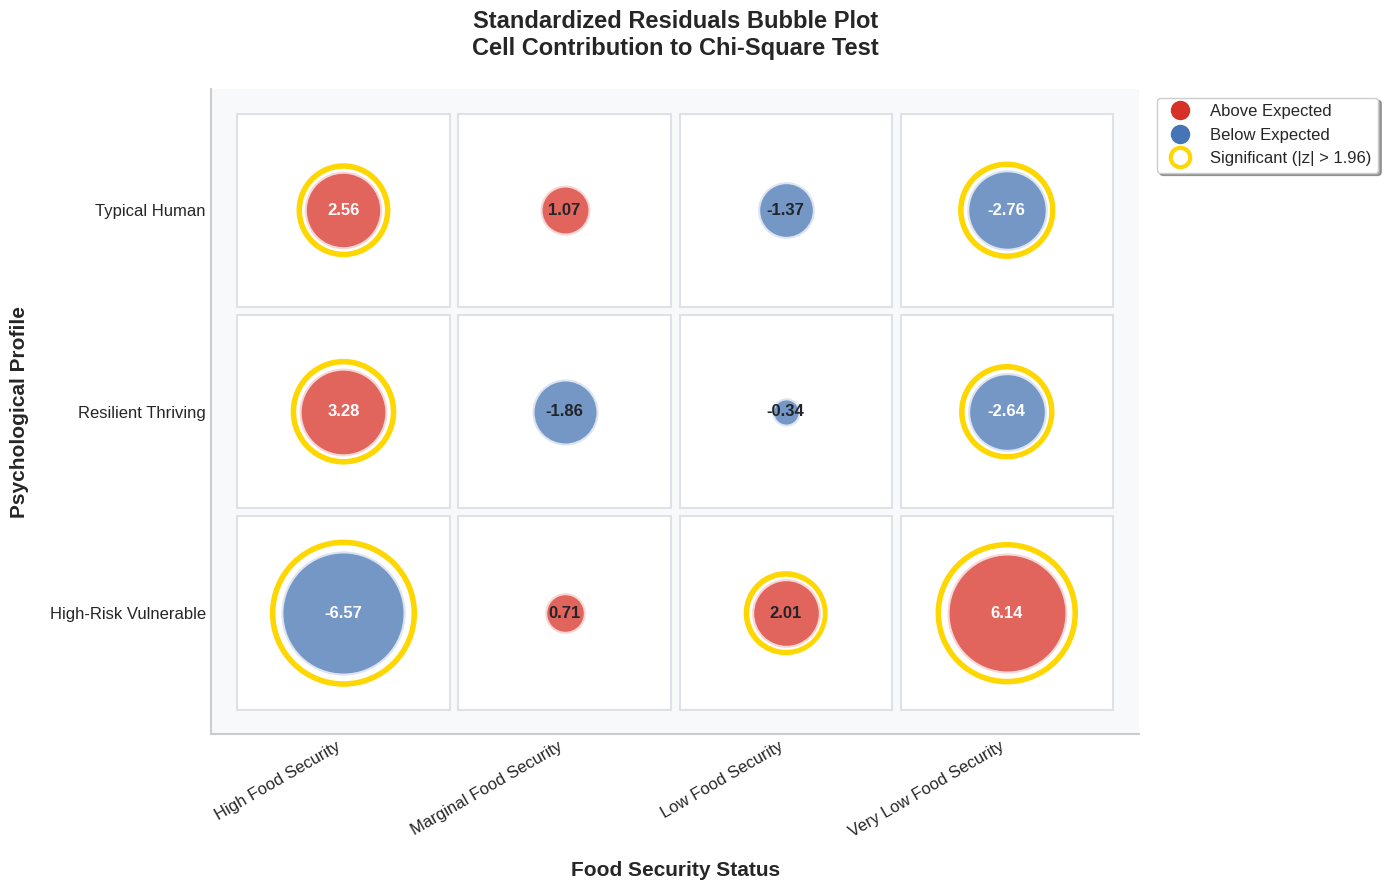

In [ ]:
fies_order = ['High Food Security', 'Marginal Food Security', 'Low Food Security', 'Very Low Food Security']

contingency_table = pd.crosstab(df['Agg_Cluster'], df['FIES_Class'])
existing_columns = [col for col in fies_order if col in contingency_table.columns]
contingency_table = contingency_table[existing_columns]

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("="*40)
print("Chi-Square Results")
print("="*40)
print(f"Chi-Square Statistic : {chi2:.4f}")
print(f"P-value              : {p:.10f}")

table = sm.stats.Table(contingency_table)
resids = table.standardized_resids

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 9))

ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

for i in range(len(resids.index)):
    for j in range(len(resids.columns)):
        rect = Rectangle((j-0.48, i-0.48), 0.96, 0.96,
                        facecolor='white', edgecolor='#dee2e6',
                        linewidth=1.5, zorder=1)
        ax.add_patch(rect)

max_abs = max(abs(resids.values.min()), abs(resids.values.max()))
size_scale = 8000 / max_abs

for i in range(len(resids.index)):
    for j in range(len(resids.columns)):
        val = resids.iloc[i, j]
        size = abs(val) * size_scale

        if val > 0:
            color = '#d73027'
        else:
            color = '#4575b4'

        ax.scatter(j, i, s=size, c=color, alpha=0.75,
                  edgecolors='white', linewidth=3, zorder=3)

        if abs(val) > 1.96:
            ax.scatter(j, i, s=size*1.3, facecolors='none',
                      edgecolors='#ffd700', linewidth=4, zorder=2)

        text_color = 'white' if abs(val) > 2.5 else '#212529'
        ax.text(j, i, f'{val:.2f}', ha='center', va='center',
               fontsize=12, fontweight='600', color=text_color, zorder=4)

ax.set_xticks(range(len(resids.columns)))
ax.set_yticks(range(len(resids.index)))
ax.set_xticklabels(resids.columns, rotation=30, ha='right', fontsize=12)
ax.set_yticklabels(resids.index, fontsize=12)

ax.set_xlabel('Food Security Status', fontsize=15, fontweight='bold', labelpad=15)
ax.set_ylabel('Psychological Profile', fontsize=15, fontweight='bold', labelpad=15)
ax.set_title('Standardized Residuals Bubble Plot\nCell Contribution to Chi-Square Test',
             fontsize=17, fontweight='bold', pad=25)

ax.set_xlim(-0.6, len(resids.columns) - 0.4)
ax.set_ylim(-0.6, len(resids.index) - 0.4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

ax.grid(False)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#d73027',
           markersize=14, label='Above Expected', markeredgewidth=0),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#4575b4',
           markersize=14, label='Below Expected', markeredgewidth=0),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='none',
           markeredgecolor='#ffd700', markersize=14, markeredgewidth=3,
           label='Significant (|z| > 1.96)')
]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.01, 1),
         fontsize=12, frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

Statistical Hypotheses for Categorical Association (Chi-Square Test)
This test was conducted to determine if there is a significant association between the Psychological Profiles (Clusters) and the categorical demographic/economic factors.

Null Hypothesis ($H_0$): There is no significant association between the student's psychological profile and the tested categorical factor (Variables are independent).

Alternative Hypothesis ($H_1$): There is a significant association between the student's psychological profile and the tested categorical factor (Variables are dependent).

Statistical DecisionChi-Square Statistic: 58.4122P-value: 0.0000000001 ($P < 0.05$)Decision: Reject the Null Hypothesis ($H_0$).

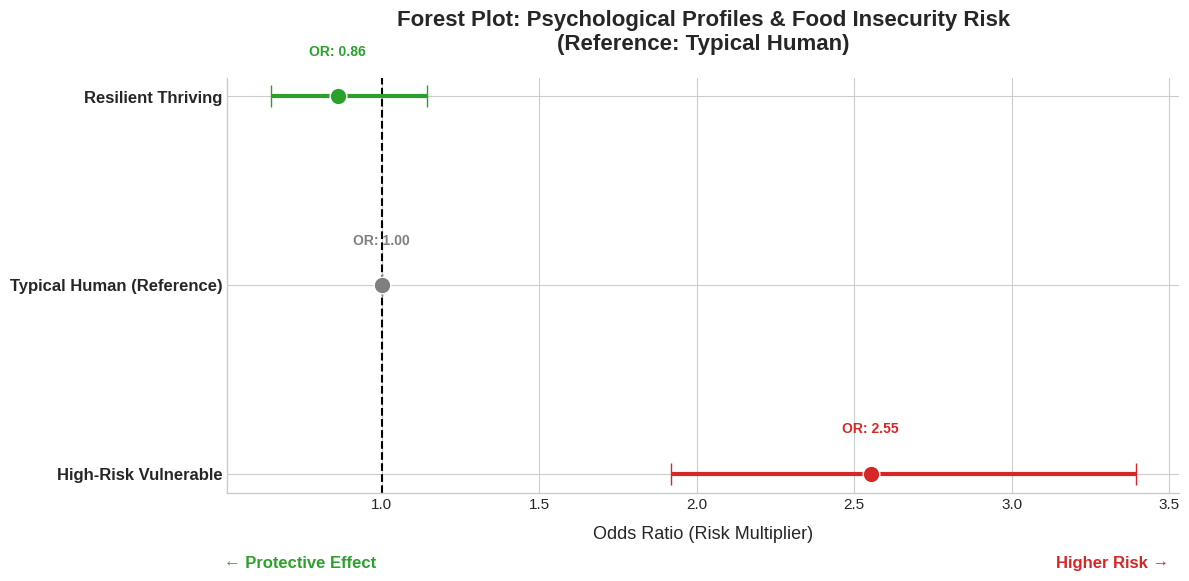

In [ ]:
data = {
    'Group': ['High-Risk Vulnerable', 'Typical Human (Reference)', 'Resilient Thriving'],
    'OR': [2.552458, 1.0, 0.860245],
    'Lower': [1.919113, 1.0, 0.647274],
    'Upper': [3.394820, 1.0, 1.143289],
    'P-Value': [1.19e-10, 1.0, 0.299],
    'Color': ['#d62728', '#7f7f7f', '#2ca02c']
}

df_plot = pd.DataFrame(data)

plt.figure(figsize=(12, 6), dpi=100)
plt.style.use('seaborn-v0_8-whitegrid')

plt.axvline(x=1, color='black', linestyle='--', linewidth=1.5, label='Baseline (Typical Human)')

for i in range(len(df_plot)):
    error_left = df_plot.loc[i, 'OR'] - df_plot.loc[i, 'Lower']
    error_right = df_plot.loc[i, 'Upper'] - df_plot.loc[i, 'OR']

    plt.errorbar(df_plot.loc[i, 'OR'], i,
                 xerr=[[error_left], [error_right]],
                 fmt='o', color=df_plot.loc[i, 'Color'],
                 markersize=12, capsize=8, capthick=2, elinewidth=3,
                 markeredgecolor='white', markeredgewidth=1)

    plt.text(df_plot.loc[i, 'OR'], i + 0.2, f"OR: {df_plot.loc[i, 'OR']:.2f}",
             ha='center', va='bottom', fontweight='bold', color=df_plot.loc[i, 'Color'])

plt.yticks(range(len(df_plot)), df_plot['Group'], fontsize=12, fontweight='bold')
plt.xticks(fontsize=11)
plt.xlabel('Odds Ratio (Risk Multiplier)', fontsize=13, labelpad=10)
plt.title('Forest Plot: Psychological Profiles & Food Insecurity Risk\n(Reference: Typical Human)',
          fontsize=16, fontweight='bold', pad=20)

plt.text(3.5, -0.5, 'Higher Risk →', fontsize=12, color='#d62728', fontweight='bold', ha='right')
plt.text(0.5, -0.5, '← Protective Effect', fontsize=12, color='#2ca02c', fontweight='bold', ha='left')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('forest_plot_typical_reference.png')
plt.show()

# RQ3

In [ ]:
cols = [
    'What is your gender?', 'What is your age?', 'Are you currently enrolled in college?',
    'How many hours do you work in an average week during the school year?',
    'Which of these describes your personal income last year?',
    'What is the total income of your primary household?',
    'Are you or your family eligible for SNAP benefits or any governmental assistance program?',
    'What is the highest level of education you have completed?',
    'What is your cumulative GPA range?', 'Agg_Cluster'
]

df_ar = df[cols].copy()

def clean_cluster(val):
    s = str(val)
    if s == '2' or 'High' in s: return 'High-Risk Vulnerable'
    if s == '1' or 'Typ' in s: return 'Typical Human'
    if s == '0' or 'Res' in s: return 'Resilient Thriving'
    return s

df_ar['Agg_Cluster'] = df_ar['Agg_Cluster'].apply(clean_cluster)
df_ohe = pd.get_dummies(df_ar, prefix_sep=': ').astype(bool)

frequent_itemsets = apriori(df_ohe, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)

clusters = ['High-Risk Vulnerable', 'Typical Human', 'Resilient Thriving']
metrics = ['support', 'confidence', 'lift']

cluster_colors = {
    'High-Risk Vulnerable': '#d62728',
    'Typical Human': '#1f77b4',
    'Resilient Thriving': '#2ca02c'
}

titles = []
for c in clusters:
    for m in metrics:
        titles.append(f"<span style='color:{cluster_colors[c]};'><b>{c}</b></span><br>{m.capitalize()}")

fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=titles,
    horizontal_spacing=0.05,
    vertical_spacing=0.08,
    specs=[[{"type": "scatter"}]*3]*3
)

def shorten(name):
    name = list(name)[0]
    mapping = {
        'What is your gender?': 'Gen', 'What is your age?': 'Age',
        'Are you currently enrolled in college?': 'Enroll',
        'How many hours do you work in an average week during the school year?': 'Work',
        'Which of these describes your personal income last year?': 'P-Inc',
        'What is the total income of your primary household?': 'H-Inc',
        'Are you or your family eligible for SNAP benefits or any governmental assistance program?': 'SNAP',
        'What is the highest level of education you have completed?': 'Edu',
        'What is your cumulative GPA range?': 'GPA',
        'Agg_Cluster': 'Clust'
    }
    for k, v in mapping.items():
        name = name.replace(k, v)
    return name

for row_idx, cluster_name in enumerate(clusters):
    target_col = [c for c in df_ohe.columns if cluster_name in c][0]
    current_color = cluster_colors[cluster_name]

    cluster_rules = rules[
        (rules['consequents'] == {target_col}) &
        (rules['antecedents'].apply(lambda x: len(x) == 1))
    ]

    for col_idx, metric in enumerate(metrics):
        top = cluster_rules.sort_values(metric, ascending=False).head(10)

        G = nx.Graph()
        center = cluster_name.replace(' ', '\n')
        G.add_node(center)

        for _, r in top.iterrows():
            ant = shorten(r['antecedents'])
            val = r[metric]
            G.add_node(ant)
            G.add_edge(center, ant, weight=val, desc=f"{metric.title()}: {val:.4f}")

        pos = nx.spring_layout(G, k=0.5, seed=42)

        weights = [d['weight'] for u, v, d in G.edges(data=True)]
        if weights:
            min_w, max_w = min(weights), max(weights)

        for u, v, d in G.edges(data=True):
            x0, y0 = pos[u]
            x1, y1 = pos[v]

            w = d['weight']
            width = 3
            if weights and max_w != min_w:
                width = 1 + 5 * ((w - min_w) / (max_w - min_w))

            fig.add_trace(
                go.Scatter(
                    x=[x0, x1, None], y=[y0, y1, None],
                    mode='lines',
                    line=dict(width=width, color='gray'),
                    hoverinfo='text',
                    hovertext=f"{u} ↔ {v}<br>{d['desc']}",
                    opacity=0.5,
                    showlegend=False
                ),
                row=row_idx+1, col=col_idx+1
            )

        node_x, node_y, node_text, node_size = [], [], [], []

        for node in G.nodes():
            x, y = pos[node]
            node_x.append(x)
            node_y.append(y)

            if node == center:
                node_size.append(35)
                node_text.append(f"<b>{node}</b>")
            else:
                node_size.append(20)
                edge_data = G.get_edge_data(center, node)
                val_txt = edge_data['desc'] if edge_data else ""
                node_text.append(f"{node}<br>{val_txt}")

        fig.add_trace(
            go.Scatter(
                x=node_x, y=node_y,
                mode='markers+text',
                text=[n.split('<')[0] for n in node_text],
                textposition="top center",
                hovertext=node_text,
                hoverinfo='text',
                marker=dict(color=current_color, size=node_size, line_width=1, line_color='white'),
                showlegend=False
            ),
            row=row_idx+1, col=col_idx+1
        )

fig.update_layout(
    title_text="<b>Comprehensive Association Rules: Drivers for All Profiles</b>",
    title_x=0.5,
    title_font_size=24,
    height=1500,
    showlegend=False,
    plot_bgcolor='white',
    hovermode='closest',
    margin=dict(l=20, r=20, t=100, b=50)
)

fig.update_xaxes(showgrid=False, zeroline=False, showticklabels=False)
fig.update_yaxes(showgrid=False, zeroline=False, showticklabels=False)

fig.show()

#RQ4

In [ ]:

sns.set_theme(style="whitegrid")

In [ ]:
gpa_col = 'What is your cumulative GPA range?'
if 'GPA_Numeric' not in df.columns:
    gpa_map = {
        '3.7-4.0': 3.85, '3.4-3.69': 3.55, '3.0-3.39': 3.20,
        '2.7-2.99': 2.85, '2.3-2.69': 2.50, '2.0-2.29': 2.15,
        '1.5-1.99': 1.75, '1.0-1.49': 1.25, 'Less than 1': 0.5
    }
    df['GPA_Clean'] = df[gpa_col].astype(str).str.strip()
    df['GPA_Numeric'] = df['GPA_Clean'].map(gpa_map)


distress_col = 'K6_Class'
resilience_col = 'RS_Class'
fies_col = 'FIES_Score'

df_model = df[[distress_col, resilience_col, fies_col, 'GPA_Numeric']].dropna().copy()

print(f"Analyzing {len(df_model)} students using existing classes.")

Analyzing 940 students using existing classes.


In [ ]:
distress_order = [
    'Likely to be Well',
    'Likely to have Moderate Disorder',
    'Likely to have Severe Disorder'
]

resilience_order = [
    'Low Resilience',
    'Normal Resilience',
    'High Resilience'
]

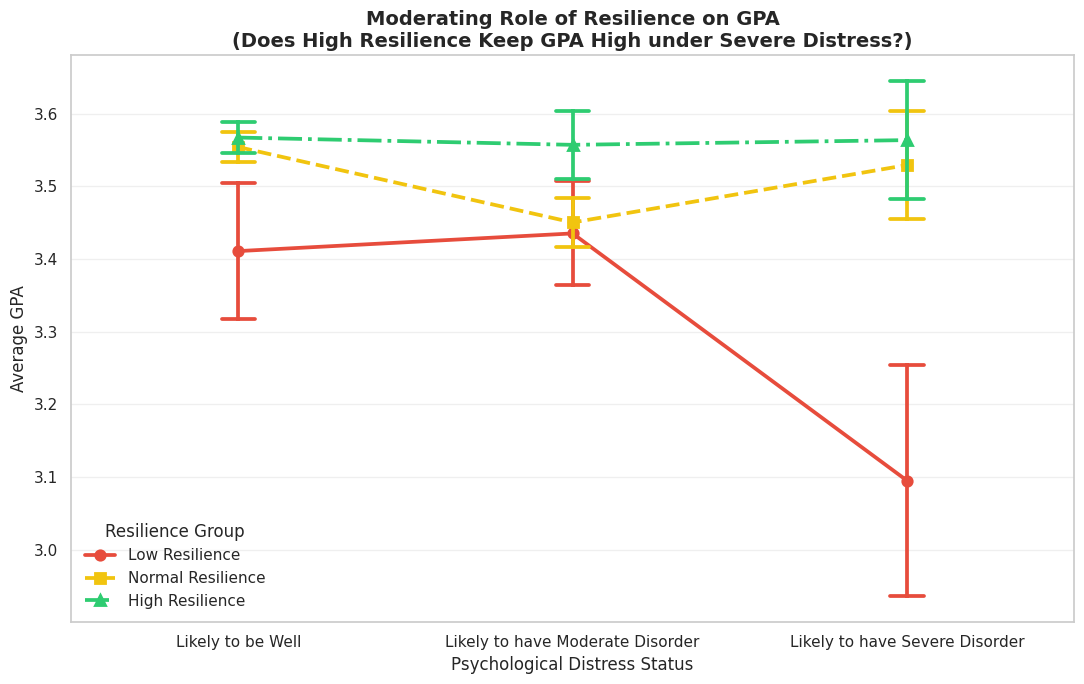

In [ ]:
plt.figure(figsize=(11, 7))

sns.pointplot(
    data=df_model,
    x=distress_col,
    y='GPA_Numeric',
    hue=resilience_col,
    order=distress_order,
    hue_order=resilience_order,
    palette={'Low Resilience': '#e74c3c', 'Normal Resilience': '#f1c40f', 'High Resilience': '#2ecc71'},
    markers=['o', 's', '^'],
    linestyles=['-', '--', '-.'],
    errorbar='se',
    capsize=0.1
)

plt.title('Moderating Role of Resilience on GPA\n(Does High Resilience Keep GPA High under Severe Distress?)', fontsize=14, fontweight='bold')
plt.xlabel('Psychological Distress Status', fontsize=12)
plt.ylabel('Average GPA', fontsize=12)
plt.legend(title='Resilience Group')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
formula = f"GPA_Numeric ~ C({distress_col}) * C({resilience_col}) + {fies_col}"
model = smf.ols(formula, data=df_model).fit()

print("\n--- ANOVA Table (Significance of Interaction) ---")
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

print("\n--- Exact GPA Means by Group ---")
print(df_model.groupby([distress_col, resilience_col])['GPA_Numeric'].mean().unstack()[resilience_order].reindex(distress_order))


--- ANOVA Table (Significance of Interaction) ---
                             sum_sq     df          F    PR(>F)
C(K6_Class)                0.394749    2.0   1.251482  0.286562
C(RS_Class)                1.698897    2.0   5.386053  0.004724
C(K6_Class):C(RS_Class)    2.155466    4.0   3.416761  0.008755
FIES_Score                 2.760161    1.0  17.501202  0.000031
Residual                 146.672755  930.0        NaN       NaN

--- Exact GPA Means by Group ---
RS_Class                          Low Resilience  Normal Resilience  \
K6_Class                                                              
Likely to be Well                       3.410938           3.554124   
Likely to have Moderate Disorder        3.435246           3.450316   
Likely to have Severe Disorder          3.095238           3.529310   

RS_Class                          High Resilience  
K6_Class                                           
Likely to be Well                        3.567187  
Likely to have Mode

Statistical Hypotheses: Academic Performance (GPA)
1. Resilience Main Effect
(RS_Class):Hypothesis: $H_0$ states there is no significant difference in GPA across resilience levels.
Decision: Reject $H_0$ ($P = 0.0047$).
Resilience significantly impacts GPA.
2. Mental Distress Main Effect (K6_Class):Hypothesis: $H_0$ states distress levels do not significantly affect GPA.Decision: Accept $H_0$ ($P = 0.2865$). Distress alone is not a significant predictor here.
3. Interaction Effect (RS $\times$ K6):Hypothesis: $H_0$ states resilience does not moderate the effect of distress on GPA.Decision: Reject $H_0$ ($P = 0.0087$). This confirms the Buffering Effect where high resilience protects GPA from the negative impact of severe distress.
4. Covariate: Food Insecurity (FIES_Score):Hypothesis: $H_0$ states food insecurity does not significantly impact GPA.Decision: Reject $H_0$ ($P = 0.00003$). It is a highly significant negative factor for academic success.

# RQ5

In [ ]:
df['Which of these describes your personal income last year?'].unique()

array([0, '$100,000 or greater', '$1 to $4,999', '30,000 to 49,999',
       'Prefer not to answer', '$50,000 to 74,999', '$75,000 to 99,999',
       '4,999 to $9,999', '$10,000 to $19,999', '$20,000 to 29,999'],
      dtype=object)

In [ ]:
df['What is the total income of your primary household?'].unique()

array(['$90,000 to $99,999', '$100,000 to $149,999', '$250,000 or more',
       '$30,000 to $39,999', '$60,000 to $69,999', '$150,000 to $249,999',
       '$40,000 to $49,999', '$50,000 to $59,999', 'Less than $10,000',
       '$20,000 to $29,999', '$10,000 to $19,999', '$80,000 to $89,999',
       '$70,000 to $79,999'], dtype=object)

In [ ]:
df['personal_raw'] = df['Which of these describes your personal income last year?'].astype(str).str.strip()
df['household_raw'] = df['What is the total income of your primary household?'].astype(str).str.strip()


personal_map = {
    '0': 'Less than $10,000',
    '$1 to $4,999': 'Less than $10,000',
    '4,999 to $9,999': 'Less than $10,000',
    '$10,000 to $19,999': '$10,000 to $29,999',
    '$20,000 to 29,999': '$10,000 to $29,999',
    '30,000 to 49,999': '$30,000 to $49,999',
    '$50,000 to 74,999': '$50,000 to $99,999',
    '$75,000 to 99,999': '$50,000 to $99,999',
    '$100,000 or greater': '$100,000 or more',
    'Prefer not to answer': np.nan
}


household_map = {
    'Less than $10,000': 'Less than $10,000',
    '$10,000 to $19,999': '$10,000 to $29,999',
    '$20,000 to $29,999': '$10,000 to $29,999',
    '$30,000 to $39,999': '$30,000 to $49,999',
    '$40,000 to $49,999': '$30,000 to $49,999',
    '$50,000 to $59,999': '$50,000 to $99,999',
    '$60,000 to $69,999': '$50,000 to $99,999',
    '$70,000 to $79,999': '$50,000 to $99,999',
    '$80,000 to $89,999': '$50,000 to $99,999',
    '$90,000 to $99,999': '$50,000 to $99,999',
    '$100,000 to $149,999': '$100,000 or more',
    '$150,000 to $249,999': '$100,000 or more',
    '$250,000 or more': '$100,000 or more'
}


df['Personal_Income_Unified'] = df['personal_raw'].map(personal_map)
df['Household_Income_Unified'] = df['household_raw'].map(household_map)


income_order_unified = [
    'Less than $10,000',
    '$10,000 to $29,999',
    '$30,000 to $49,999',
    '$50,000 to $99,999',
    '$100,000 or more'
]

In [ ]:
df_melted = df.melt(value_vars=['Personal_Income_Unified', 'Household_Income_Unified'],
                    var_name='Income_Type', value_name='Income_Level')

fig = px.histogram(df_melted, x='Income_Level', color='Income_Type',
                   barmode='group', category_orders={'Income_Level': income_order_unified},
                   title="Comparison: Personal vs Household Income (Unified)")
fig.show()

In [ ]:
rs_mapping = {'Low Resilience': 0, 'Normal Resilience': 1, 'High Resilience': 2}
k6_mapping = {'Likely to have Severe Disorder': 0, 'Likely to have Moderate Disorder': 1, 'Likely to be Well': 2}
smm_mapping = {'Debilitating Effect': 0, 'Moderate Effect': 1, 'Enhancing Effect': 2}


df['RS_Class_score'] = df['RS_Class'].map(rs_mapping)
df['K6_Class_score'] = df['K6_Class'].map(k6_mapping)
df['SMM_Class_score'] = df['SMM_Class'].map(smm_mapping)

df['Total_Score'] = (df['RS_Class_score'] +
    df['K6_Class_score']+
    df['SMM_Class_score']
)

print(df[['RS_Class_score', 'K6_Class_score', 'SMM_Class_score', 'Total_Score']].head())

   RS_Class_score  K6_Class_score  SMM_Class_score  Total_Score
0               2               2                1            5
1               2               2                1            5
2               2               2                1            5
3               1               2                1            4
4               2               2                1            5


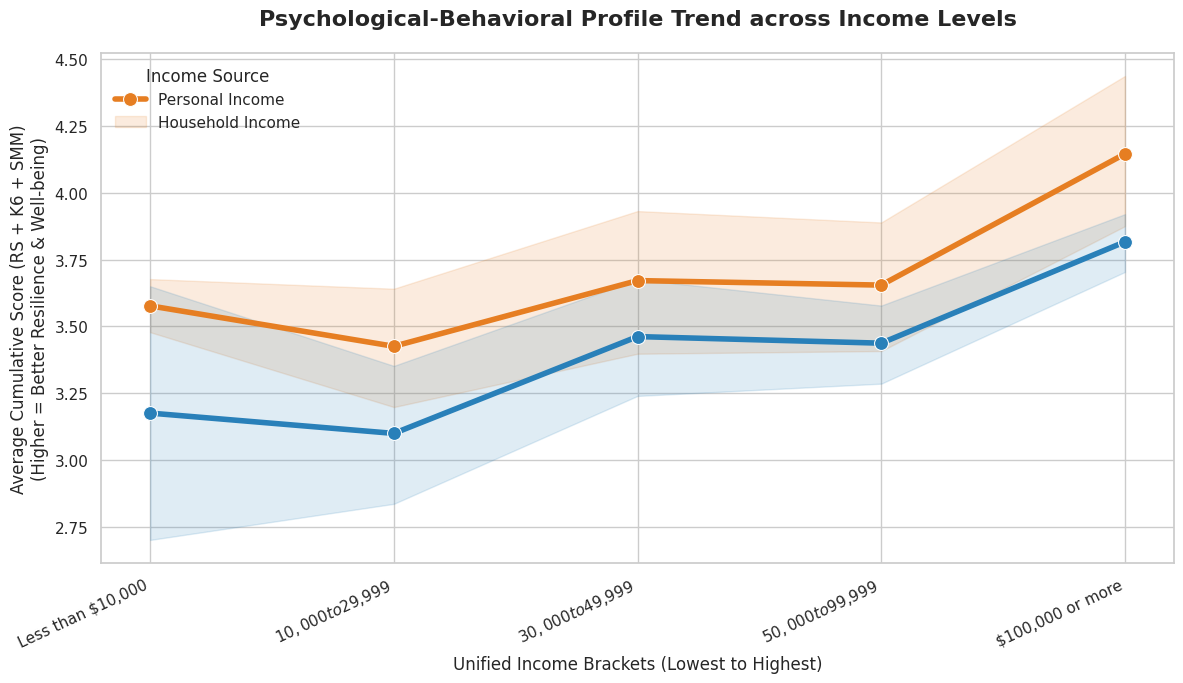

In [ ]:
df_trend = df.melt(
    id_vars=['Total_Score'],
    value_vars=['Personal_Income_Unified', 'Household_Income_Unified'],
    var_name='Income_Source',
    value_name='Income_Level'
)


df_trend = df_trend.dropna(subset=['Income_Level', 'Total_Score'])


income_order_unified = [
    'Less than $10,000',
    '$10,000 to $29,999',
    '$30,000 to $49,999',
    '$50,000 to $99,999',
    '$100,000 or more'
]

df_trend['Income_Level'] = pd.Categorical(
    df_trend['Income_Level'],
    categories=income_order_unified,
    ordered=True
)


plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")


sns.lineplot(
    data=df_trend,
    x='Income_Level',
    y='Total_Score',
    hue='Income_Source',
    marker="o",
    markersize=10,
    linewidth=4,
    palette=['#e67e22', '#2980b9'],
    err_style="band",
    err_kws={'alpha': 0.15}
)


plt.title('Psychological-Behavioral Profile Trend across Income Levels',
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Average Cumulative Score (RS + K6 + SMM)\n(Higher = Better Resilience & Well-being)', fontsize=12)
plt.xlabel('Unified Income Brackets (Lowest to Highest)', fontsize=12)

plt.xticks(rotation=25, ha='right')
plt.legend(title='Income Source', labels=['Personal Income', 'Household Income'])



plt.tight_layout()
plt.show()

In [ ]:



def categorize_wellbeing(score):
    if score <= 2: return 'Low Well-being'
    elif score <= 4: return 'Moderate Well-being'
    else: return 'High Well-being'

df['Wellbeing_Category'] = df['Total_Score'].apply(categorize_wellbeing)


df_chi = df.dropna(subset=['Wellbeing_Category', 'Personal_Income_Unified', 'Household_Income_Unified'])


def run_chi2(data, var1, var2):
    contingency_table = pd.crosstab(data[var1], data[var2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p, contingency_table

chi_p, p_p, table_p = run_chi2(df_chi, 'Personal_Income_Unified', 'Wellbeing_Category')
chi_h, p_h, table_h = run_chi2(df_chi, 'Household_Income_Unified', 'Wellbeing_Category')

print(f"--- Chi-Square: Personal Income vs Wellbeing ---")
print(f"Chi2 Statistic: {chi_p:.2f}, P-value: {p_p:.4f}")
print("\n" + "="*50 + "\n")
print(f"--- Chi-Square: Household Income vs Wellbeing ---")
print(f"Chi2 Statistic: {chi_h:.2f}, P-value: {p_h:.8f}")

--- Chi-Square: Personal Income vs Wellbeing ---
Chi2 Statistic: 23.22, P-value: 0.0031


--- Chi-Square: Household Income vs Wellbeing ---
Chi2 Statistic: 36.44, P-value: 0.00001459


Statistical Hypotheses: Income vs. Psychological Wellbeing1.
 Personal Income vs. Wellbeing:Hypothesis:
  $H_0$ states there is no significant association between personal income levels and psychological wellbeing profiles.Decision: Reject $H_0$ (Chi2: 23.22, $P = 0.0031$). There is a statistically significant relationship between an individual's personal income and their wellbeing profile.2. Household Income vs. Wellbeing:Hypothesis: $H_0$ states there is no significant association between total household income and psychological wellbeing profiles.Decision: Reject $H_0$ (Chi2: 36.44, $P = 0.00001$).
  There is a highly significant association between household income and the student's wellbeing profile.Key Analytical FindingHousehold vs. Personal Impact: The higher Chi-Square statistic and lower P-value for Household Income suggest that the overall economic status of the family has a stronger and more significant association with a student's psychological profile than their individual personal income.Significance: Both factors are critical, but household stability appears to be a more dominant predictor of being in a "Resilient Thriving" vs. "High-Risk Vulnerable" group.